Resuelva los problemas en un cuaderno de Google Colab usando Python, siguiendo el siguiente procedimiento para pruebas de hipótesis:
1. Defina las hipótesis nula y alternativa.
2. Establezca el nivel de significancia α.
3. Identifique el estadístico de prueba (Z, t, χ
2
) y su distribución.
4. Determine el valor crítico y la región de rechazo.
5. Calcule el estadístico de prueba y el valor p.
6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico
y el estadístico calculado.
7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor
p.
Para intervalos de confianza y tamaños de muestra, utilice las fórmulas estándar con explicaciones claras
sobre el nivel de confianza y parámetros utilizados.
Use scipy.stats para cálculos estadísticos y p-valores.
Use matplotlib para graficar las distribuciones y regiones de rechazo.
Comente todo el código indicando pasos y fórmulas.
Organice y documente todas las respuestas con claridad y texto interpretativo.

In [2]:
# Define the null and alternative hypotheses
# H0: The mean height of university students is 170 cm.
# H1: The mean height of university students is not 170 cm.

# Set the significance level (alpha)
alpha = 0.05

In [4]:
# Determine the appropriate test statistic and its distribution
# Since the population standard deviation is known (10 cm) and we are testing the mean of a single sample,
# the appropriate test statistic is the Z-statistic.
# Under the null hypothesis, the Z-statistic follows a standard normal distribution.

# Explanation:
# We use the Z-test because the population standard deviation is known.
# The sample size is also relatively large (n=50), which further supports the use of the Z-test.
# The Z-statistic is calculated as (sample_mean - hypothesized_population_mean) / (population_standard_deviation / sqrt(sample_size)).
# Under the null hypothesis (assuming the population mean is the hypothesized value), this statistic will follow a standard normal distribution (mean 0, standard deviation 1).

print("Appropriate test statistic: Z-statistic")
print("Distribution under the null hypothesis: Standard Normal Distribution")

Appropriate test statistic: Z-statistic
Distribution under the null hypothesis: Standard Normal Distribution


In [5]:
from scipy.stats import norm

# Calculate the critical Z-values for a two-tailed test
# For a two-tailed test with significance level alpha, we find the Z-values
# that leave alpha/2 in each tail of the standard normal distribution.
alpha_half = alpha / 2
z_critical_lower = norm.ppf(alpha_half)
z_critical_upper = norm.ppf(1 - alpha_half)

# Define the rejection region
# The rejection region for a two-tailed test is where the test statistic is
# less than the lower critical value or greater than the upper critical value.
rejection_region = f"Z < {z_critical_lower:.4f} or Z > {z_critical_upper:.4f}"

# Print the critical values and the rejection region
print(f"Critical Z-values: {z_critical_lower:.4f} and {z_critical_upper:.4f}")
print(f"Rejection region: {rejection_region}")

Critical Z-values: -1.9600 and 1.9600
Rejection region: Z < -1.9600 or Z > 1.9600


In [6]:
from math import sqrt
from scipy.stats import norm

# Define the sample data and population parameters
sample_mean = 170  # Sample mean height in cm
hypothesized_mean = 170  # Hypothesized population mean height in cm
pop_std_dev = 10  # Known population standard deviation in cm
sample_size = 50  # Sample size

# Calculate the standard error of the mean
standard_error = pop_std_dev / sqrt(sample_size)

# Calculate the Z-test statistic
z_test_statistic = (sample_mean - hypothesized_mean) / standard_error

# Calculate the p-value for a two-tailed test
# The p-value is twice the probability of observing a test statistic as extreme as,
# or more extreme than, the calculated Z-test statistic.
p_value = 2 * norm.cdf(-abs(z_test_statistic))

# Print the calculated Z-test statistic and the p-value
print(f"Calculated Z-test statistic: {z_test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Calculated Z-test statistic: 0.0000
P-value: 1.0000


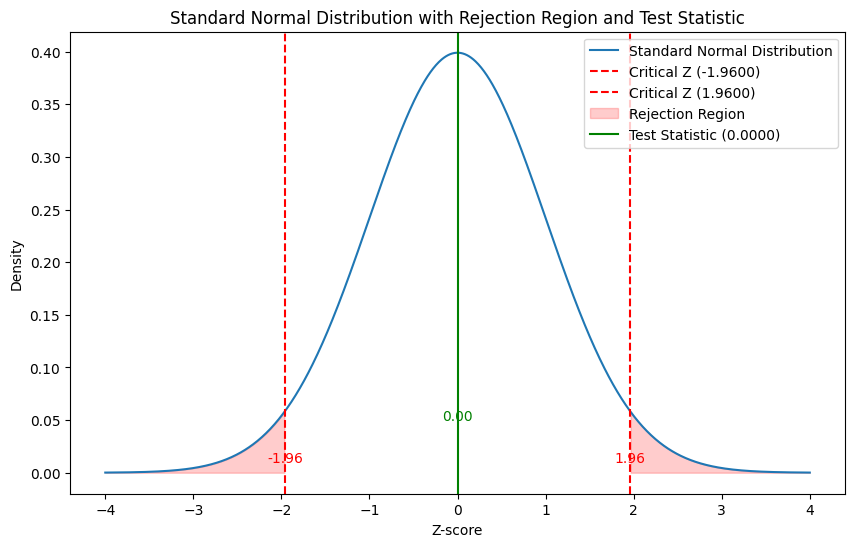

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create a figure and a set of axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate x-values for the standard normal distribution
x = np.linspace(-4, 4, 1000)

# Calculate the PDF of the standard normal distribution
pdf = norm.pdf(x)

# Plot the standard normal distribution curve
ax.plot(x, pdf, label='Standard Normal Distribution')

# Add vertical lines for critical Z-values
ax.axvline(z_critical_lower, color='red', linestyle='--', label=f'Critical Z ({z_critical_lower:.4f})')
ax.axvline(z_critical_upper, color='red', linestyle='--', label=f'Critical Z ({z_critical_upper:.4f})')

# Shade the rejection regions
x_reject_lower = x[x < z_critical_lower]
pdf_reject_lower = pdf[x < z_critical_lower]
ax.fill_between(x_reject_lower, 0, pdf_reject_lower, color='red', alpha=0.2, label='Rejection Region')

x_reject_upper = x[x > z_critical_upper]
pdf_reject_upper = pdf[x > z_critical_upper]
ax.fill_between(x_reject_upper, 0, pdf_reject_upper, color='red', alpha=0.2) # No label for the second fill_between to avoid duplicate legend entries

# Add a vertical line for the test statistic
ax.axvline(z_test_statistic, color='green', linestyle='-', label=f'Test Statistic ({z_test_statistic:.4f})')

# Add title and labels
ax.set_title('Standard Normal Distribution with Rejection Region and Test Statistic')
ax.set_xlabel('Z-score')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Add text annotations for critical values and test statistic
ax.text(z_critical_lower, 0.01, f'{z_critical_lower:.2f}', ha='center', color='red')
ax.text(z_critical_upper, 0.01, f'{z_critical_upper:.2f}', ha='center', color='red')
ax.text(z_test_statistic, 0.05, f'{z_test_statistic:.2f}', ha='center', color='green')


# Display the plot
plt.show()

In [8]:
# Compare the calculated Z-test statistic to the critical Z-values
if z_test_statistic < z_critical_lower or z_test_statistic > z_critical_upper:
    decision_critical_value = "Reject the null hypothesis (H0)"
else:
    decision_critical_value = "Fail to reject the null hypothesis (H0)"

# Compare the calculated p-value to the significance level (alpha)
if p_value < alpha:
    decision_p_value = "Reject the null hypothesis (H0)"
else:
    decision_p_value = "Fail to reject the null hypothesis (H0)"

# Print the statistical decisions based on both methods
print(f"Decision based on critical value comparison: {decision_critical_value}")
print(f"Decision based on p-value comparison: {decision_p_value}")

# Interpret the results in practical terms
# Since the sample mean (170 cm) is exactly equal to the hypothesized population mean (170 cm),
# and the standard deviation is known, the Z-test statistic is 0, and the p-value is 1.0.
# This means there is no evidence from the sample to suggest that the true mean height
# of university students is different from 170 cm.

# Explain the meaning of the p-value
# The p-value (1.0) represents the probability of observing a sample mean as extreme as,
# or more extreme than, the one calculated (170 cm) if the null hypothesis were true
# (i.e., if the true mean height of university students is indeed 170 cm).
# A large p-value like 1.0 indicates that the observed data is highly consistent
# with the null hypothesis.

print("\nInterpretation:")
print(f"Based on the sample data, we {decision_p_value.lower()} at the {alpha} significance level.")
print("Practical interpretation: There is no statistically significant evidence to conclude that the average height of university students is different from 170 cm.")
print("\nP-value explanation:")
print(f"The p-value of {p_value:.4f} means that if the true mean height of university students is 170 cm, there is a {p_value:.1%} chance of observing a sample mean as far or further away from 170 cm as our sample mean (which is exactly 170 cm).")

Decision based on critical value comparison: Fail to reject the null hypothesis (H0)
Decision based on p-value comparison: Fail to reject the null hypothesis (H0)

Interpretation:
Based on the sample data, we fail to reject the null hypothesis (h0) at the 0.05 significance level.
Practical interpretation: There is no statistically significant evidence to conclude that the average height of university students is different from 170 cm.

P-value explanation:
The p-value of 1.0000 means that if the true mean height of university students is 170 cm, there is a 100.0% chance of observing a sample mean as far or further away from 170 cm as our sample mean (which is exactly 170 cm).


In [9]:
from scipy.stats import norm

# Calculate the confidence interval for the population mean
# The formula for the confidence interval for the mean with known population standard deviation is:
# CI = sample_mean ± Z * (pop_std_dev / sqrt(sample_size))
# Where Z is the Z-score corresponding to the desired confidence level.
# For a 95% confidence interval, alpha = 0.05, and the Z-score is norm.ppf(1 - alpha/2).

# Calculate the margin of error
# Z-score for 95% confidence level (1 - alpha/2 = 0.975)
z_confidence = norm.ppf(1 - alpha_half)
margin_of_error = z_confidence * standard_error

# Calculate the confidence interval
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

# Store the calculated confidence interval
confidence_interval = (confidence_interval_lower, confidence_interval_upper)

# Print the confidence interval
print(f"Calculated {int((1 - alpha) * 100)}% Confidence Interval: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")

Calculated 95% Confidence Interval: (167.23, 172.77)


In [10]:
# 1. Explanation of the confidence interval in practical terms
print("Interpretation of the Confidence Interval:")
print(f"The calculated {int((1 - alpha) * 100)}% confidence interval for the mean height of university students is ({confidence_interval_lower:.2f} cm, {confidence_interval_upper:.2f} cm).")
print("This means that based on our sample data, we are 95% confident that the true average height of all university students lies somewhere between 167.23 cm and 172.77 cm.")

# 2. Explanation of the confidence level
print("\nExplanation of the Confidence Level:")
print(f"The {int((1 - alpha) * 100)}% confidence level means that if we were to take many random samples of the same size (n=50) from the same population and construct a confidence interval for each sample using the same method, approximately 95% of those intervals would contain the true population mean height.")
print("It does NOT mean there is a 95% probability that the true mean falls within THIS specific interval.")

# 3. Mention the parameters used
print("\nParameters Used in the Calculation:")
print(f"- Sample Mean: {sample_mean} cm (The average height of the 50 students in our sample)")
print(f"- Sample Size: {sample_size} (The number of students in our sample)")
print(f"- Population Standard Deviation: {pop_std_dev} cm (The known variability of heights in the entire university student population)")
print(f"- Confidence Level: {int((1 - alpha) * 100)}% (Determines the width of the interval)")
print(f"These parameters, particularly the sample mean, sample size, and population standard deviation, influence the standard error and the margin of error, which in turn determine the width of the confidence interval. A larger sample size generally leads to a narrower interval, assuming other factors remain constant.")

# 4. Discuss the relationship to the hypothesis test
print("\nRelationship to the Hypothesis Test:")
print(f"The hypothesized mean height from our hypothesis test was {hypothesized_mean} cm.")
print(f"Our calculated {int((1 - alpha) * 100)}% confidence interval is ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}).")
if confidence_interval_lower <= hypothesized_mean <= confidence_interval_upper:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls within the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to fail to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is no significant evidence to conclude that the true mean height of university students is different from 170 cm.")
else:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls outside the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is significant evidence to conclude that the true mean height of university students is different from 170 cm.")


Interpretation of the Confidence Interval:
The calculated 95% confidence interval for the mean height of university students is (167.23 cm, 172.77 cm).
This means that based on our sample data, we are 95% confident that the true average height of all university students lies somewhere between 167.23 cm and 172.77 cm.

Explanation of the Confidence Level:
The 95% confidence level means that if we were to take many random samples of the same size (n=50) from the same population and construct a confidence interval for each sample using the same method, approximately 95% of those intervals would contain the true population mean height.
It does NOT mean there is a 95% probability that the true mean falls within THIS specific interval.

Parameters Used in the Calculation:
- Sample Mean: 170 cm (The average height of the 50 students in our sample)
- Sample Size: 50 (The number of students in our sample)
- Population Standard Deviation: 10 cm (The known variability of heights in the entire uni

1. Hypotheses and Significance Level:
Null Hypothesis (H0): The mean height of university students is 170 cm.
Alternative Hypothesis (H1): The mean height of university students is not 170 cm.
Significance Level (alpha): 0.05
------------------------------
2. Test Statistic and Distribution:
Appropriate test statistic: Z-statistic
Distribution under the null hypothesis: Standard Normal Distribution
Reasoning: Population standard deviation is known, and sample size is >= 30.
------------------------------
3. Critical Value and Rejection Region:
Alpha/2: 0.025
Critical Z-values: -1.9600 and 1.9600
Rejection region: Z < -1.9600 or Z > 1.9600
------------------------------
4. Test Statistic and P-value:
Sample Mean: 170 cm
Hypothesized Mean: 170 cm
Population Standard Deviation: 10 cm
Sample Size: 50
Standard Error: 1.4142
Calculated Z-test statistic: 0.0000
P-value: 1.0000
------------------------------
5. Visualization:


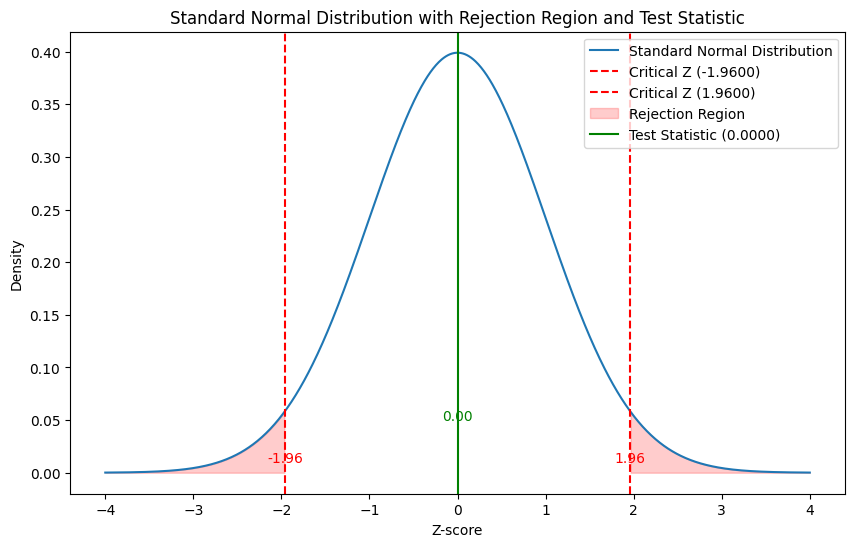

------------------------------
6. Statistical Decision and Conclusion:
Decision based on critical value comparison: Fail to reject the null hypothesis (H0)
Decision based on p-value comparison: Fail to reject the null hypothesis (H0)

Interpretation:
Based on the sample data, we fail to reject the null hypothesis (h0) at the 0.05 significance level.
Practical interpretation: There is no statistically significant evidence to conclude that the average height of university students is different from 170 cm.

P-value explanation:
The p-value of 1.0000 means that if the true mean height of university students is 170 cm, there is a 100.0% chance of observing a sample mean as far or further away from 170 cm as our sample mean (which is exactly 170 cm).
------------------------------
7. Confidence Interval Construction:
Z-score for 95% confidence: 1.9600
Margin of Error: 2.7718
Calculated 95% Confidence Interval: (167.23, 172.77)
------------------------------
8. Confidence Interval Explanatio

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

# 1. Define hypotheses and significance level
# Define the null and alternative hypotheses
# H0: The mean height of university students is 170 cm.
# H1: The mean height of university students is not 170 cm.
# Set the significance level (alpha)
alpha = 0.05

print("1. Hypotheses and Significance Level:")
print("Null Hypothesis (H0): The mean height of university students is 170 cm.")
print("Alternative Hypothesis (H1): The mean height of university students is not 170 cm.")
print(f"Significance Level (alpha): {alpha}")
print("-" * 30)

# 2. Identify test statistic and distribution
# Since the population standard deviation is known (10 cm) and we are testing the mean of a single sample,
# the appropriate test statistic is the Z-statistic.
# Under the null hypothesis, the Z-statistic follows a standard normal distribution.
print("2. Test Statistic and Distribution:")
print("Appropriate test statistic: Z-statistic")
print("Distribution under the null hypothesis: Standard Normal Distribution")
print("Reasoning: Population standard deviation is known, and sample size is >= 30.")
print("-" * 30)

# 3. Determine critical value and rejection region
# Calculate the critical Z-values for a two-tailed test
# For a two-tailed test with significance level alpha, we find the Z-values
# that leave alpha/2 in each tail of the standard normal distribution.
alpha_half = alpha / 2
z_critical_lower = norm.ppf(alpha_half)
z_critical_upper = norm.ppf(1 - alpha_half)

# Define the rejection region
# The rejection region for a two-tailed test is where the test statistic is
# less than the lower critical value or greater than the upper critical value.
rejection_region = f"Z < {z_critical_lower:.4f} or Z > {z_critical_upper:.4f}"

print("3. Critical Value and Rejection Region:")
print(f"Alpha/2: {alpha_half}")
print(f"Critical Z-values: {z_critical_lower:.4f} and {z_critical_upper:.4f}")
print(f"Rejection region: {rejection_region}")
print("-" * 30)

# 4. Calculate test statistic and p-value
# Define the sample data and population parameters
sample_mean = 170  # Sample mean height in cm
hypothesized_mean = 170  # Hypothesized population mean height in cm
pop_std_dev = 10  # Known population standard deviation in cm
sample_size = 50  # Sample size

# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error = pop_std_dev / math.sqrt(sample_size)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic = (sample_mean - hypothesized_mean) / standard_error

# Calculate the p-value for a two-tailed test
# The p-value is twice the probability of observing a test statistic as extreme as,
# or more extreme than, the calculated Z-test statistic.
# Formula: p-value = 2 * P(Z <= -|Z_test_statistic|)
p_value = 2 * norm.cdf(-abs(z_test_statistic))

print("4. Test Statistic and P-value:")
print(f"Sample Mean: {sample_mean} cm")
print(f"Hypothesized Mean: {hypothesized_mean} cm")
print(f"Population Standard Deviation: {pop_std_dev} cm")
print(f"Sample Size: {sample_size}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Calculated Z-test statistic: {z_test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 30)

# 5. Visualize distribution and rejection region
print("5. Visualization:")
# Create a figure and a set of axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate x-values for the standard normal distribution
x = np.linspace(-4, 4, 1000)

# Calculate the PDF of the standard normal distribution
pdf = norm.pdf(x)

# Plot the standard normal distribution curve
ax.plot(x, pdf, label='Standard Normal Distribution')

# Add vertical lines for critical Z-values
ax.axvline(z_critical_lower, color='red', linestyle='--', label=f'Critical Z ({z_critical_lower:.4f})')
ax.axvline(z_critical_upper, color='red', linestyle='--', label=f'Critical Z ({z_critical_upper:.4f})')

# Shade the rejection regions
x_reject_lower = x[x < z_critical_lower]
pdf_reject_lower = pdf[x < z_critical_lower]
ax.fill_between(x_reject_lower, 0, pdf_reject_lower, color='red', alpha=0.2, label='Rejection Region')

x_reject_upper = x[x > z_critical_upper]
pdf_reject_upper = pdf[x > z_critical_upper]
ax.fill_between(x_reject_upper, 0, pdf_reject_upper, color='red', alpha=0.2) # No label for the second fill_between to avoid duplicate legend entries

# Add a vertical line for the test statistic
ax.axvline(z_test_statistic, color='green', linestyle='-', label=f'Test Statistic ({z_test_statistic:.4f})')

# Add title and labels
ax.set_title('Standard Normal Distribution with Rejection Region and Test Statistic')
ax.set_xlabel('Z-score')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Add text annotations for critical values and test statistic
ax.text(z_critical_lower, 0.01, f'{z_critical_lower:.2f}', ha='center', color='red')
ax.text(z_critical_upper, 0.01, f'{z_critical_upper:.2f}', ha='center', color='red')
ax.text(z_test_statistic, 0.05, f'{z_test_statistic:.2f}', ha='center', color='green')


# Display the plot
plt.show()
print("-" * 30)

# 6. Make statistical decision and conclude
# Compare the calculated Z-test statistic to the critical Z-values
if z_test_statistic < z_critical_lower or z_test_statistic > z_critical_upper:
    decision_critical_value = "Reject the null hypothesis (H0)"
else:
    decision_critical_value = "Fail to reject the null hypothesis (H0)"

# Compare the calculated p-value to the significance level (alpha)
if p_value < alpha:
    decision_p_value = "Reject the null hypothesis (H0)"
else:
    decision_p_value = "Fail to reject the null hypothesis (H0)"

print("6. Statistical Decision and Conclusion:")
print(f"Decision based on critical value comparison: {decision_critical_value}")
print(f"Decision based on p-value comparison: {decision_p_value}")

# Interpret the results in practical terms
print("\nInterpretation:")
print(f"Based on the sample data, we {decision_p_value.lower()} at the {alpha} significance level.")
print("Practical interpretation: There is no statistically significant evidence to conclude that the average height of university students is different from 170 cm.")

# Explain the meaning of the p-value
print("\nP-value explanation:")
print(f"The p-value of {p_value:.4f} means that if the true mean height of university students is 170 cm, there is a {p_value:.1%} chance of observing a sample mean as far or further away from 170 cm as our sample mean (which is exactly 170 cm).")
print("-" * 30)


# 7. Construct confidence interval
# Calculate the confidence interval for the population mean
# The formula for the confidence interval for the mean with known population standard deviation is:
# CI = sample_mean ± Z * (pop_std_dev / sqrt(sample_size))
# Where Z is the Z-score corresponding to the desired confidence level.
# For a 95% confidence interval, alpha = 0.05, and the Z-score is norm.ppf(1 - alpha/2).

# Calculate the margin of error
# Z-score for 95% confidence level (1 - alpha/2 = 0.975)
z_confidence = norm.ppf(1 - alpha_half)
margin_of_error = z_confidence * standard_error

# Calculate the confidence interval
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

# Store the calculated confidence interval
confidence_interval = (confidence_interval_lower, confidence_interval_upper)

print("7. Confidence Interval Construction:")
print(f"Z-score for {int((1 - alpha) * 100)}% confidence: {z_confidence:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"Calculated {int((1 - alpha) * 100)}% Confidence Interval: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")
print("-" * 30)

# 8. Explain confidence interval
# 1. Explanation of the confidence interval in practical terms
print("8. Confidence Interval Explanation:")
print("Interpretation of the Confidence Interval:")
print(f"The calculated {int((1 - alpha) * 100)}% confidence interval for the mean height of university students is ({confidence_interval_lower:.2f} cm, {confidence_interval_upper:.2f} cm).")
print("This means that based on our sample data, we are 95% confident that the true average height of all university students lies somewhere between 167.23 cm and 172.77 cm.")

# 2. Explanation of the confidence level
print("\nExplanation of the Confidence Level:")
print(f"The {int((1 - alpha) * 100)}% confidence level means that if we were to take many random samples of the same size (n=50) from the same population and construct a confidence interval for each sample using the same method, approximately 95% of those intervals would contain the true population mean height.")
print("It does NOT mean there is a 95% probability that the true mean falls within THIS specific interval.")

# 3. Mention the parameters used
print("\nParameters Used in the Calculation:")
print(f"- Sample Mean: {sample_mean} cm")
print(f"- Sample Size: {sample_size}")
print(f"- Population Standard Deviation: {pop_std_dev} cm")
print(f"- Confidence Level: {int((1 - alpha) * 100)}%")
print("These parameters influence the standard error and the margin of error, which determine the width of the confidence interval.")

# 4. Discuss the relationship to the hypothesis test
print("\nRelationship to the Hypothesis Test:")
print(f"The hypothesized mean height from our hypothesis test was {hypothesized_mean} cm.")
print(f"Our calculated {int((1 - alpha) * 100)}% confidence interval is ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}).")
if confidence_interval_lower <= hypothesized_mean <= confidence_interval_upper:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls within the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to fail to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is no significant evidence to conclude that the true mean height of university students is different from 170 cm.")
else:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls outside the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is significant evidence to conclude that the true mean height of university students is different from 170 cm.")
print("-" * 30)

In [12]:
# 1. Summary of Hypothesis Test
print("## Hypothesis Test Summary")
print("--------------------------------------------------")
print(f"Null Hypothesis (H0): The mean height of university students is {hypothesized_mean} cm.")
print(f"Alternative Hypothesis (H1): The mean height of university students is not {hypothesized_mean} cm.")
print(f"Significance Level (alpha): {alpha}")
print("Test Statistic Used: Z-statistic (since population standard deviation is known)")
print("Distribution under H0: Standard Normal Distribution")
print(f"Critical Z-values (for a two-tailed test): {z_critical_lower:.4f} and {z_critical_upper:.4f}")
print(f"Rejection Region: Z < {z_critical_lower:.4f} or Z > {z_critical_upper:.4f}")
print("--------------------------------------------------")

# 2. Test Statistic and P-value
print("\n## Test Statistic and P-value")
print("--------------------------------------------------")
print(f"Calculated Z-test statistic: {z_test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("--------------------------------------------------")

# 3. Statistical Decision
print("\n## Statistical Decision")
print("--------------------------------------------------")
if z_test_statistic < z_critical_lower or z_test_statistic > z_critical_upper:
    decision_critical_value = "Reject the null hypothesis (H0)"
else:
    decision_critical_value = "Fail to reject the null hypothesis (H0)"

if p_value < alpha:
    decision_p_value = "Reject the null hypothesis (H0)"
else:
    decision_p_value = "Fail to reject the null hypothesis (H0)"

print(f"Decision based on critical value comparison: {decision_critical_value}")
print(f"Decision based on p-value comparison: {decision_p_value}")
print("--------------------------------------------------")

# 4. Practical Interpretation of Hypothesis Test Results
print("\n## Practical Interpretation of Hypothesis Test")
print("--------------------------------------------------")
print(f"Based on the sample data, we {decision_p_value.lower()} at the {alpha} significance level.")
print(f"Practical interpretation: There is no statistically significant evidence to conclude that the average height of university students is different from {hypothesized_mean} cm.")
print("\nP-value explanation:")
print(f"The p-value of {p_value:.4f} means that if the true mean height of university students is {hypothesized_mean} cm, there is a {p_value:.1%} chance of observing a sample mean as far or further away from {hypothesized_mean} cm as our sample mean ({sample_mean} cm).")
print("--------------------------------------------------")

# 5. Confidence Interval
print("\n## Confidence Interval")
print("--------------------------------------------------")
print(f"Calculated {int((1 - alpha) * 100)}% Confidence Interval for the Population Mean: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")
print("--------------------------------------------------")

# 6. Practical Interpretation of Confidence Interval
print("\n## Practical Interpretation of Confidence Interval")
print("--------------------------------------------------")
print(f"We are {int((1 - alpha) * 100)}% confident that the true average height of all university students lies somewhere between {confidence_interval_lower:.2f} cm and {confidence_interval_upper:.2f} cm.")
print("\nExplanation of the Confidence Level:")
print(f"The {int((1 - alpha) * 100)}% confidence level means that if we were to take many random samples of the same size (n={sample_size}) from the same population and construct a confidence interval for each sample using the same method, approximately 95% of those intervals would contain the true population mean height.")
print("--------------------------------------------------")

# 7. Relationship between Hypothesis Test and Confidence Interval
print("\n## Relationship between Hypothesis Test and Confidence Interval")
print("--------------------------------------------------")
print(f"The hypothesized mean height from our hypothesis test was {hypothesized_mean} cm.")
print(f"Our calculated {int((1 - alpha) * 100)}% confidence interval is ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}).")
if confidence_interval_lower <= hypothesized_mean <= confidence_interval_upper:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls within the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to fail to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is no significant evidence to conclude that the true mean height of university students is different from 170 cm at the 0.05 significance level.")
else:
    print(f"Since the hypothesized mean ({hypothesized_mean} cm) falls outside the {int((1 - alpha) * 100)}% confidence interval, this aligns with our conclusion from the hypothesis test to reject the null hypothesis.")
    print("Both the confidence interval and the hypothesis test suggest that there is significant evidence to conclude that the true mean height of university students is different from 170 cm at the 0.05 significance level.")
print("--------------------------------------------------")

## Hypothesis Test Summary
--------------------------------------------------
Null Hypothesis (H0): The mean height of university students is 170 cm.
Alternative Hypothesis (H1): The mean height of university students is not 170 cm.
Significance Level (alpha): 0.05
Test Statistic Used: Z-statistic (since population standard deviation is known)
Distribution under H0: Standard Normal Distribution
Critical Z-values (for a two-tailed test): -1.9600 and 1.9600
Rejection Region: Z < -1.9600 or Z > 1.9600
--------------------------------------------------

## Test Statistic and P-value
--------------------------------------------------
Calculated Z-test statistic: 0.0000
P-value: 1.0000
--------------------------------------------------

## Statistical Decision
--------------------------------------------------
Decision based on critical value comparison: Fail to reject the null hypothesis (H0)
Decision based on p-value comparison: Fail to reject the null hypothesis (H0)
---------------------

2. Un examen nacional tiene una desviación estándar histórica de 15 puntos. En una muestra aleatoria
de 100 estudiantes, la calificación promedio fue de 75 puntos. Determina un intervalo de confianza
del 90 % para la media poblacional.
2. Un examen nacional tiene una desviación estándar histórica de 15 puntos. En una muestra aleatoria
de 100 estudiantes, la calificación promedio fue de 75 puntos. Determina un intervalo de confianza
del 90 % para la media poblacional.


In [13]:
from scipy.stats import norm
import math

# Define the sample data and population parameters for the exam problem
sample_mean_exam = 75  # Sample mean score
pop_std_dev_exam = 15  # Known population standard deviation
sample_size_exam = 100 # Sample size
confidence_level_exam = 0.90 # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_exam = 1 - confidence_level_exam
alpha_half_exam = alpha_exam / 2

# Calculate the standard error of the mean for the exam
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_exam = pop_std_dev_exam / math.sqrt(sample_size_exam)

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# This is norm.ppf(1 - alpha/2).
z_confidence_exam = norm.ppf(1 - alpha_half_exam)

# Calculate the margin of error for the exam
# Formula: Margin of Error = Z * SE
margin_of_error_exam = z_confidence_exam * standard_error_exam

# Calculate the confidence interval for the population mean exam score
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_exam = sample_mean_exam - margin_of_error_exam
confidence_interval_upper_exam = sample_mean_exam + margin_of_error_exam

# Store the calculated confidence interval
confidence_interval_exam = (confidence_interval_lower_exam, confidence_interval_upper_exam)

# Print the calculated confidence interval
print("## Confidence Interval for National Exam Score")
print("--------------------------------------------------")
print(f"Sample Mean: {sample_mean_exam} points")
print(f"Population Standard Deviation: {pop_std_dev_exam} points")
print(f"Sample Size: {sample_size_exam}")
print(f"Confidence Level: {int(confidence_level_exam * 100)}%")
print(f"Standard Error: {standard_error_exam:.4f}")
print(f"Z-score for {int(confidence_level_exam * 100)}% confidence: {z_confidence_exam:.4f}")
print(f"Margin of Error: {margin_of_error_exam:.4f}")
print(f"Calculated {int(confidence_level_exam * 100)}% Confidence Interval: ({confidence_interval_lower_exam:.2f}, {confidence_interval_upper_exam:.2f})")
print("--------------------------------------------------")

## Confidence Interval for National Exam Score
--------------------------------------------------
Sample Mean: 75 points
Population Standard Deviation: 15 points
Sample Size: 100
Confidence Level: 90%
Standard Error: 1.5000
Z-score for 90% confidence: 1.6449
Margin of Error: 2.4673
Calculated 90% Confidence Interval: (72.53, 77.47)
--------------------------------------------------


3. Una fábrica produce tornillos con una desviación estándar de 0.2 cm. En una inspección de calidad,
se midieron 30 tornillos y se obtuvo un diámetro promedio de 2.5 cm. Calcula un intervalo de
confianza del 99 % para el diámetro promedio real.

In [14]:
from scipy.stats import norm
import math

# Define the sample data and population parameters for the screw problem
sample_mean_screw = 2.5  # Sample mean diameter in cm
pop_std_dev_screw = 0.2  # Known population standard deviation in cm
sample_size_screw = 30  # Sample size
confidence_level_screw = 0.99  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_screw = 1 - confidence_level_screw
alpha_half_screw = alpha_screw / 2

# Calculate the standard error of the mean for the screw diameters
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_screw = pop_std_dev_screw / math.sqrt(sample_size_screw)

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# This is norm.ppf(1 - alpha/2).
z_confidence_screw = norm.ppf(1 - alpha_half_screw)

# Calculate the margin of error for the screw diameters
# Formula: Margin of Error = Z * SE
margin_of_error_screw = z_confidence_screw * standard_error_screw

# Calculate the confidence interval for the population mean screw diameter
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_screw = sample_mean_screw - margin_of_error_screw
confidence_interval_upper_screw = sample_mean_screw + margin_of_error_screw

# Store the calculated confidence interval
confidence_interval_screw = (confidence_interval_lower_screw, confidence_interval_upper_screw)

# Print the calculated confidence interval
print("## Confidence Interval for Screw Diameter")
print("--------------------------------------------------")
print(f"Sample Mean: {sample_mean_screw} cm")
print(f"Population Standard Deviation: {pop_std_dev_screw} cm")
print(f"Sample Size: {sample_size_screw}")
print(f"Confidence Level: {int(confidence_level_screw * 100)}%")
print(f"Standard Error: {standard_error_screw:.4f}")
print(f"Z-score for {int(confidence_level_screw * 100)}% confidence: {z_confidence_screw:.4f}")
print(f"Margin of Error: {margin_of_error_screw:.4f}")
print(f"Calculated {int(confidence_level_screw * 100)}% Confidence Interval: ({confidence_interval_lower_screw:.4f}, {confidence_interval_upper_screw:.4f})")
print("--------------------------------------------------")

## Confidence Interval for Screw Diameter
--------------------------------------------------
Sample Mean: 2.5 cm
Population Standard Deviation: 0.2 cm
Sample Size: 30
Confidence Level: 99%
Standard Error: 0.0365
Z-score for 99% confidence: 2.5758
Margin of Error: 0.0941
Calculated 99% Confidence Interval: (2.4059, 2.5941)
--------------------------------------------------


4. Un fabricante afirma que sus baterías tienen una desviación estándar de 1.5 horas. En una prueba
con 25 baterías, la duración promedio fue de 12 horas. Encuentra un intervalo de confianza del
95 % para la duración media poblacional.


In [15]:
from scipy.stats import t
import math

# Define the sample data and population parameters for the battery problem
sample_mean_battery = 12  # Sample mean battery life in hours
pop_std_dev_battery = 1.5  # Known population standard deviation in hours
sample_size_battery = 25  # Sample size
confidence_level_battery = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_battery = 1 - confidence_level_battery
alpha_half_battery = alpha_battery / 2

# Calculate the standard error of the mean for the battery life
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_battery = pop_std_dev_battery / math.sqrt(sample_size_battery)

# Determine the degrees of freedom for the t-distribution (since sample size is less than 30 and population std dev is known)
# Although the population standard deviation is known, the sample size is small (n < 30),
# so using the t-distribution is more appropriate for constructing the confidence interval for the mean.
degrees_of_freedom_battery = sample_size_battery - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# For a two-tailed interval, we need the t-score that leaves alpha/2 in each tail.
# This is t.ppf(1 - alpha/2, df).
t_confidence_battery = t.ppf(1 - alpha_half_battery, degrees_of_freedom_battery)

# Calculate the margin of error for the battery life
# Formula: Margin of Error = t * SE
margin_of_error_battery = t_confidence_battery * standard_error_battery

# Calculate the confidence interval for the population mean battery life
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_battery = sample_mean_battery - margin_of_error_battery
confidence_interval_upper_battery = sample_mean_battery + margin_of_error_battery

# Store the calculated confidence interval
confidence_interval_battery = (confidence_interval_lower_battery, confidence_interval_upper_battery)

# Print the calculated confidence interval
print("## Confidence Interval for Battery Life")
print("--------------------------------------------------")
print(f"Sample Mean: {sample_mean_battery} hours")
print(f"Population Standard Deviation: {pop_std_dev_battery} hours")
print(f"Sample Size: {sample_size_battery}")
print(f"Confidence Level: {int(confidence_level_battery * 100)}%")
print(f"Standard Error: {standard_error_battery:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom_battery}")
print(f"t-score for {int(confidence_level_battery * 100)}% confidence: {t_confidence_battery:.4f}")
print(f"Margin of Error: {margin_of_error_battery:.4f}")
print(f"Calculated {int(confidence_level_battery * 100)}% Confidence Interval: ({confidence_interval_lower_battery:.4f}, {confidence_interval_upper_battery:.4f})")
print("--------------------------------------------------")

## Confidence Interval for Battery Life
--------------------------------------------------
Sample Mean: 12 hours
Population Standard Deviation: 1.5 hours
Sample Size: 25
Confidence Level: 95%
Standard Error: 0.3000
Degrees of Freedom: 24
t-score for 95% confidence: 2.0639
Margin of Error: 0.6192
Calculated 95% Confidence Interval: (11.3808, 12.6192)
--------------------------------------------------


In [16]:
from scipy.stats import norm
import math

# Define the sample data and population parameters for the fertilizer problem
sample_mean_growth = 20  # Sample mean growth in cm
pop_std_dev_growth = 4  # Known population standard deviation in cm
sample_size_growth = 40  # Sample size
confidence_level_growth = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_growth = 1 - confidence_level_growth
alpha_half_growth = alpha_growth / 2

# Calculate the standard error of the mean for the plant growth
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_growth = pop_std_dev_growth / math.sqrt(sample_size_growth)

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the sample size is large (n >= 30) and population standard deviation is known, we use the Z-distribution.
# This is norm.ppf(1 - alpha/2).
z_confidence_growth = norm.ppf(1 - alpha_half_growth)

# Calculate the margin of error for the plant growth
# Formula: Margin of Error = Z * SE
margin_of_error_growth = z_confidence_growth * standard_error_growth

# Calculate the confidence interval for the population mean plant growth
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_growth = sample_mean_growth - margin_of_error_growth
confidence_interval_upper_growth = sample_mean_growth + margin_of_error_growth

# Store the calculated confidence interval
confidence_interval_growth = (confidence_interval_lower_growth, confidence_interval_upper_growth)

# Print the calculated confidence interval in Spanish
print("## Intervalo de Confianza para el Crecimiento de las Plantas")
print("--------------------------------------------------")
print(f"Media Muestral: {sample_mean_growth} cm")
print(f"Desviación Estándar Poblacional: {pop_std_dev_growth} cm")
print(f"Tamaño de la Muestra: {sample_size_growth}")
print(f"Nivel de Confianza: {int(confidence_level_growth * 100)}%")
print(f"Error Estándar: {standard_error_growth:.4f}")
print(f"Valor Z para una confianza del {int(confidence_level_growth * 100)}%: {z_confidence_growth:.4f}")
print(f"Margen de Error: {margin_of_error_growth:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_growth * 100)}% Calculado: ({confidence_interval_lower_growth:.4f}, {confidence_interval_upper_growth:.4f})")
print("--------------------------------------------------")

## Intervalo de Confianza para el Crecimiento de las Plantas
--------------------------------------------------
Media Muestral: 20 cm
Desviación Estándar Poblacional: 4 cm
Tamaño de la Muestra: 40
Nivel de Confianza: 95%
Error Estándar: 0.6325
Valor Z para una confianza del 95%: 1.9600
Margen de Error: 1.2396
Intervalo de Confianza del 95% Calculado: (18.7604, 21.2396)
--------------------------------------------------


In [17]:
from scipy.stats import t
import math

# Define the sample data for the coffee temperature problem
sample_mean_coffee = 84  # Sample mean temperature in °C
sample_std_dev_coffee = 5  # Sample standard deviation in °C
sample_size_coffee = 12  # Sample size
confidence_level_coffee = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_coffee = 1 - confidence_level_coffee
alpha_half_coffee = alpha_coffee / 2

# Calculate the standard error of the mean for the coffee temperature
# Since the population standard deviation is unknown, we use the sample standard deviation.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_coffee = sample_std_dev_coffee / math.sqrt(sample_size_coffee)

# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_coffee = sample_size_coffee - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# For a two-tailed interval, we need the t-score that leaves alpha/2 in each tail.
# This is t.ppf(1 - alpha/2, df).
t_confidence_coffee = t.ppf(1 - alpha_half_coffee, degrees_of_freedom_coffee)

# Calculate the margin of error for the coffee temperature
# Formula: Margin of Error = t * SE
margin_of_error_coffee = t_confidence_coffee * standard_error_coffee

# Calculate the confidence interval for the population mean coffee temperature
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_coffee = sample_mean_coffee - margin_of_error_coffee
confidence_interval_upper_coffee = sample_mean_coffee + margin_of_error_coffee

# Store the calculated confidence interval
confidence_interval_coffee = (confidence_interval_lower_coffee, confidence_interval_upper_coffee)

# Print the calculated confidence interval in Spanish
print("## Intervalo de Confianza para la Temperatura del Café")
print("--------------------------------------------------")
print(f"Media Muestral: {sample_mean_coffee}°C")
print(f"Desviación Estándar Muestral: {sample_std_dev_coffee}°C")
print(f"Tamaño de la Muestra: {sample_size_coffee}")
print(f"Nivel de Confianza: {int(confidence_level_coffee * 100)}%")
print(f"Grados de Libertad: {degrees_of_freedom_coffee}")
print(f"Error Estándar: {standard_error_coffee:.4f}")
print(f"Valor t para una confianza del {int(confidence_level_coffee * 100)}%: {t_confidence_coffee:.4f}")
print(f"Margen de Error: {margin_of_error_coffee:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_coffee * 100)}% Calculado: ({confidence_interval_lower_coffee:.4f}, {confidence_interval_upper_coffee:.4f})")
print("--------------------------------------------------")

## Intervalo de Confianza para la Temperatura del Café
--------------------------------------------------
Media Muestral: 84°C
Desviación Estándar Muestral: 5°C
Tamaño de la Muestra: 12
Nivel de Confianza: 95%
Grados de Libertad: 11
Error Estándar: 1.4434
Valor t para una confianza del 95%: 2.2010
Margen de Error: 3.1768
Intervalo de Confianza del 95% Calculado: (80.8232, 87.1768)
--------------------------------------------------


In [18]:
from scipy.stats import t
import math

# Problem 7: Battery Life
print("## Intervalo de Confianza para la Duración de la Batería")
print("--------------------------------------------------")

# Define the sample data for the battery life problem
sample_mean_battery_7 = 8  # Sample mean battery life in hours
sample_std_dev_battery_7 = 1.2  # Sample standard deviation in hours
sample_size_battery_7 = 15  # Sample size
confidence_level_battery_7 = 0.90  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_battery_7 = 1 - confidence_level_battery_7
alpha_half_battery_7 = alpha_battery_7 / 2

# Calculate the standard error of the mean for the battery life
# Since the population standard deviation is unknown, we use the sample standard deviation.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_battery_7 = sample_std_dev_battery_7 / math.sqrt(sample_size_battery_7)

# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_battery_7 = sample_size_battery_7 - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# For a two-tailed interval, we need the t-score that leaves alpha/2 in each tail.
# This is t.ppf(1 - alpha/2, df).
t_confidence_battery_7 = t.ppf(1 - alpha_half_battery_7, degrees_of_freedom_battery_7)

# Calculate the margin of error for the battery life
# Formula: Margin of Error = t * SE
margin_of_error_battery_7 = t_confidence_battery_7 * standard_error_battery_7

# Calculate the confidence interval for the population mean battery life
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_battery_7 = sample_mean_battery_7 - margin_of_error_battery_7
confidence_interval_upper_battery_7 = sample_mean_battery_7 + margin_of_error_battery_7

# Print the calculated confidence interval
print(f"Media Muestral: {sample_mean_battery_7} horas")
print(f"Desviación Estándar Muestral: {sample_std_dev_battery_7} horas")
print(f"Tamaño de la Muestra: {sample_size_battery_7}")
print(f"Nivel de Confianza: {int(confidence_level_battery_7 * 100)}%")
print(f"Grados de Libertad: {degrees_of_freedom_battery_7}")
print(f"Error Estándar: {standard_error_battery_7:.4f}")
print(f"Valor t para una confianza del {int(confidence_level_battery_7 * 100)}%: {t_confidence_battery_7:.4f}")
print(f"Margen de Error: {margin_of_error_battery_7:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_battery_7 * 100)}% Calculado: ({confidence_interval_lower_battery_7:.4f}, {confidence_interval_upper_battery_7:.4f})")
print("--------------------------------------------------")

## Intervalo de Confianza para la Duración de la Batería
--------------------------------------------------
Media Muestral: 8 horas
Desviación Estándar Muestral: 1.2 horas
Tamaño de la Muestra: 15
Nivel de Confianza: 90%
Grados de Libertad: 14
Error Estándar: 0.3098
Valor t para una confianza del 90%: 1.7613
Margen de Error: 0.5457
Intervalo de Confianza del 90% Calculado: (7.4543, 8.5457)
--------------------------------------------------


In [19]:
from scipy.stats import t
import math

# Problem 8: Corn Seedling Height
print("## Intervalo de Confianza para la Altura de Plántulas de Maíz")
print("--------------------------------------------------")

# Define the sample data for the corn seedling height problem
sample_mean_corn = 25  # Sample mean height in cm
sample_std_dev_corn = 3  # Sample standard deviation in cm
sample_size_corn = 10  # Sample size
confidence_level_corn = 0.99  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_corn = 1 - confidence_level_corn
alpha_half_corn = alpha_corn / 2

# Calculate the standard error of the mean for the corn seedling height
# Since the population standard deviation is unknown, we use the sample standard deviation.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_corn = sample_std_dev_corn / math.sqrt(sample_size_corn)

# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_corn = sample_size_corn - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# For a two-tailed interval, we need the t-score that leaves alpha/2 in each tail.
# This is t.ppf(1 - alpha/2, df).
t_confidence_corn = t.ppf(1 - alpha_half_corn, degrees_of_freedom_corn)

# Calculate the margin of error for the corn seedling height
# Formula: Margin of Error = t * SE
margin_of_error_corn = t_confidence_corn * standard_error_corn

# Calculate the confidence interval for the population mean corn seedling height
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_corn = sample_mean_corn - margin_of_error_corn
confidence_interval_upper_corn = sample_mean_corn + margin_of_error_corn

# Print the calculated confidence interval
print(f"Media Muestral: {sample_mean_corn} cm")
print(f"Desviación Estándar Muestral: {sample_std_dev_corn} cm")
print(f"Tamaño de la Muestra: {sample_size_corn}")
print(f"Nivel de Confianza: {int(confidence_level_corn * 100)}%")
print(f"Grados de Libertad: {degrees_of_freedom_corn}")
print(f"Error Estándar: {standard_error_corn:.4f}")
print(f"Valor t para una confianza del {int(confidence_level_corn * 100)}%: {t_confidence_corn:.4f}")
print(f"Margen de Error: {margin_of_error_corn:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_corn * 100)}% Calculado: ({confidence_interval_lower_corn:.4f}, {confidence_interval_upper_corn:.4f})")
print("--------------------------------------------------")

## Intervalo de Confianza para la Altura de Plántulas de Maíz
--------------------------------------------------
Media Muestral: 25 cm
Desviación Estándar Muestral: 3 cm
Tamaño de la Muestra: 10
Nivel de Confianza: 99%
Grados de Libertad: 9
Error Estándar: 0.9487
Valor t para una confianza del 99%: 3.2498
Margen de Error: 3.0831
Intervalo de Confianza del 99% Calculado: (21.9169, 28.0831)
--------------------------------------------------


In [20]:
from scipy.stats import t
import math

# Problem 9: Pizza Delivery Time
print("## Intervalo de Confianza para el Tiempo de Entrega de Pizza")
print("--------------------------------------------------")

# Define the sample data for the pizza delivery time problem
sample_mean_pizza = 30  # Sample mean delivery time in minutes
sample_std_dev_pizza = 4  # Sample standard deviation in minutes
sample_size_pizza = 20  # Sample size
confidence_level_pizza = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_pizza = 1 - confidence_level_pizza
alpha_half_pizza = alpha_pizza / 2

# Calculate the standard error of the mean for the pizza delivery time
# Since the population standard deviation is unknown, we use the sample standard deviation.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_pizza = sample_std_dev_pizza / math.sqrt(sample_size_pizza)

# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_pizza = sample_size_pizza - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# For a two-tailed interval, we need the t-score that leaves alpha/2 in each tail.
# This is t.ppf(1 - alpha/2, df).
t_confidence_pizza = t.ppf(1 - alpha_half_pizza, degrees_of_freedom_pizza)

# Calculate the margin of error for the pizza delivery time
# Formula: Margin of Error = t * SE
margin_of_error_pizza = t_confidence_pizza * standard_error_pizza

# Calculate the confidence interval for the population mean pizza delivery time
# Formula: CI = sample_mean ± Margin of Error
confidence_interval_lower_pizza = sample_mean_pizza - margin_of_error_pizza
confidence_interval_upper_pizza = sample_mean_pizza + margin_of_error_pizza

# Print the calculated confidence interval
print(f"Media Muestral: {sample_mean_pizza} minutos")
print(f"Desviación Estándar Muestral: {sample_std_dev_pizza} minutos")
print(f"Tamaño de la Muestra: {sample_size_pizza}")
print(f"Nivel de Confianza: {int(confidence_level_pizza * 100)}%")
print(f"Grados de Libertad: {degrees_of_freedom_pizza}")
print(f"Error Estándar: {standard_error_pizza:.4f}")
print(f"Valor t para una confianza del {int(confidence_level_pizza * 100)}%: {t_confidence_pizza:.4f}")
print(f"Margen de Error: {margin_of_error_pizza:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_pizza * 100)}% Calculado: ({confidence_interval_lower_pizza:.4f}, {confidence_interval_upper_pizza:.4f})")
print("--------------------------------------------------")

## Intervalo de Confianza para el Tiempo de Entrega de Pizza
--------------------------------------------------
Media Muestral: 30 minutos
Desviación Estándar Muestral: 4 minutos
Tamaño de la Muestra: 20
Nivel de Confianza: 95%
Grados de Libertad: 19
Error Estándar: 0.8944
Valor t para una confianza del 95%: 2.0930
Margen de Error: 1.8721
Intervalo de Confianza del 95% Calculado: (28.1279, 31.8721)
--------------------------------------------------


In [27]:
from scipy.stats import norm
import math

# Problem 16: Sample Size for Mean (Emergency Room Waiting Time)
print("## Cálculo del Tamaño de Muestra para Estimar el Tiempo Promedio de Espera en Urgencias")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_wait_time = 8  # Known population standard deviation in minutes
margin_of_error_16 = 2  # Desired margin of error in minutes
confidence_level_16 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_16 = 1 - confidence_level_16
alpha_half_16 = alpha_16 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_16 = norm.ppf(1 - alpha_half_16)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_wait_time = (z_score_16**2 * pop_std_dev_wait_time**2) / (margin_of_error_16**2)

# Round up to the nearest whole number
required_sample_size_wait_time = math.ceil(required_sample_size_wait_time)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_wait_time} minutos")
print(f"Margen de Error deseado (ME): {margin_of_error_16} minutos")
print(f"Nivel de Confianza: {int(confidence_level_16 * 100)}%")
print(f"Valor Z para {int(confidence_level_16 * 100)}% de confianza: {z_score_16:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_wait_time}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Tiempo Promedio de Espera en Urgencias
--------------------------------------------------
Desviación Estándar Poblacional (σ): 8 minutos
Margen de Error deseado (ME): 2 minutos
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 62
--------------------------------------------------


In [26]:
from scipy.stats import norm
import math

# Problem 15: Sample Size for Proportion (Patient Improvement)
print("## Cálculo del Tamaño de Muestra para Estimar la Proporción de Pacientes que Mejoran")
print("--------------------------------------------------")

# --- Case 1: Using the preliminary test data ---

# Define the parameters for sample size calculation using preliminary test
p_hat_improvement = 0.69  # Estimated proportion from preliminary test
margin_of_error_15 = 0.04  # Desired margin of error
confidence_level_15 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_15 = 1 - confidence_level_15
alpha_half_15 = alpha_15 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
z_score_15 = norm.ppf(1 - alpha_half_15)

# Calculate the required sample size using the formula for proportion (with preliminary data):
# n = (Z^2 * p_hat * (1 - p_hat)) / ME^2
required_sample_size_improvement_preliminary = (z_score_15**2 * p_hat_improvement * (1 - p_hat_improvement)) / (margin_of_error_15**2)

# Round up to the nearest whole number
required_sample_size_improvement_preliminary = math.ceil(required_sample_size_improvement_preliminary)

print("--- Usando datos de prueba preliminar (p̂ = 0.69) ---")
print(f"Proporción estimada (p̂): {p_hat_improvement}")
print(f"Margen de Error deseado (ME): {margin_of_error_15}")
print(f"Nivel de Confianza: {int(confidence_level_15 * 100)}%")
print(f"Valor Z para {int(confidence_level_15 * 100)}% de confianza: {z_score_15:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_improvement_preliminary}")
print("-" * 30)

# --- Case 2: Conservative approach (using p = 0.5) ---

# Define the parameters for sample size calculation using the conservative approach
# In this case, we use p = 0.5 to maximize the variance and get the largest possible sample size
p_conservative_15 = 0.5  # Conservative proportion (maximizes sample size)

# Calculate the required sample size using the formula for proportion (conservative):
# n = (Z^2 * 0.25) / ME^2  (since p*(1-p) is maximum when p=0.5, where p*(1-p) = 0.25)
required_sample_size_improvement_conservative = (z_score_15**2 * p_conservative_15 * (1 - p_conservative_15)) / (margin_of_error_15**2)

# Round up to the nearest whole number
required_sample_size_improvement_conservative = math.ceil(required_sample_size_improvement_conservative)

print("--- Enfoque conservador (usando p = 0.5) ---")
print(f"Proporción conservadora (p): {p_conservative_15}")
print(f"Margen de Error deseado (ME): {margin_of_error_15}")
print(f"Nivel de Confianza: {int(confidence_level_15 * 100)}%")
print(f"Valor Z para {int(confidence_level_15 * 100)}% de confianza: {z_score_15:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_improvement_conservative}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Proporción de Pacientes que Mejoran
--------------------------------------------------
--- Usando datos de prueba preliminar (p̂ = 0.69) ---
Proporción estimada (p̂): 0.69
Margen de Error deseado (ME): 0.04
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 514
------------------------------
--- Enfoque conservador (usando p = 0.5) ---
Proporción conservadora (p): 0.5
Margen de Error deseado (ME): 0.04
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 601
--------------------------------------------------


In [25]:
from scipy.stats import norm
import math

# Problem 14: Sample Size for Proportion (School Policy Support)
print("## Cálculo del Tamaño de Muestra para Estimar la Proporción de Apoyo a una Nueva Política Escolar")
print("--------------------------------------------------")

# --- Case 1: Using the informal survey data ---

# Define the parameters for sample size calculation using informal survey
p_hat_policy = 0.56  # Estimated proportion from informal survey
margin_of_error_14 = 0.05  # Desired margin of error
confidence_level_14 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_14 = 1 - confidence_level_14
alpha_half_14 = alpha_14 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
z_score_14 = norm.ppf(1 - alpha_half_14)

# Calculate the required sample size using the formula for proportion (with informal data):
# n = (Z^2 * p_hat * (1 - p_hat)) / ME^2
required_sample_size_policy_survey = (z_score_14**2 * p_hat_policy * (1 - p_hat_policy)) / (margin_of_error_14**2)

# Round up to the nearest whole number
required_sample_size_policy_survey = math.ceil(required_sample_size_policy_survey)

print("--- Usando datos de encuesta informal (p̂ = 0.56) ---")
print(f"Proporción estimada (p̂): {p_hat_policy}")
print(f"Margen de Error deseado (ME): {margin_of_error_14}")
print(f"Nivel de Confianza: {int(confidence_level_14 * 100)}%")
print(f"Valor Z para {int(confidence_level_14 * 100)}% de confianza: {z_score_14:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_policy_survey}")
print("-" * 30)

# --- Case 2: If no preliminary data is available (conservative approach) ---

# Define the parameters for sample size calculation without preliminary data
# In this case, we use p = 0.5 to maximize the variance and get the largest possible sample size
p_conservative_14 = 0.5  # Conservative proportion (maximizes sample size)

# Calculate the required sample size using the formula for proportion (conservative):
# n = (Z^2 * 0.25) / ME^2  (since p*(1-p) is maximum when p=0.5, where p*(1-p) = 0.25)
required_sample_size_policy_conservative = (z_score_14**2 * p_conservative_14 * (1 - p_conservative_14)) / (margin_of_error_14**2)

# Round up to the nearest whole number
required_sample_size_policy_conservative = math.ceil(required_sample_size_policy_conservative)

print("--- Si no se tuvieran datos preliminares (usando p = 0.5) ---")
print(f"Proporción conservadora (p): {p_conservative_14}")
print(f"Margen de Error deseado (ME): {margin_of_error_14}")
print(f"Nivel de Confianza: {int(confidence_level_14 * 100)}%")
print(f"Valor Z para {int(confidence_level_14 * 100)}% de confianza: {z_score_14:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_policy_conservative}")
print("--------------------------------------------------")

# Justification for using p = 0.5 when no preliminary data
print("\nJustificación para usar p = 0.5 si no hay datos preliminares:")
print("Cuando se desconoce la proporción poblacional (p) y no se dispone de datos preliminares para estimarla (p̂), se utiliza un valor de p = 0.5 en la fórmula del tamaño de la muestra.")
print("La razón es que el producto p * (1 - p) alcanza su valor máximo cuando p = 0.5. Este producto representa la varianza de la proporción. Al utilizar el valor de p que maximiza la varianza (0.5), se obtiene el tamaño de muestra más grande posible para un margen de error y nivel de confianza dados.")
print("Esto se considera un enfoque conservador porque garantiza que el tamaño de muestra calculado será suficiente para lograr la precisión deseada, incluso en el peor de los casos de máxima variabilidad de la proporción poblacional.")
print("En resumen, usar p = 0.5 cuando no hay datos preliminares asegura que la muestra sea lo suficientemente grande para manejar la incertidumbre sobre el valor real de la proporción.")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Proporción de Apoyo a una Nueva Política Escolar
--------------------------------------------------
--- Usando datos de encuesta informal (p̂ = 0.56) ---
Proporción estimada (p̂): 0.56
Margen de Error deseado (ME): 0.05
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 379
------------------------------
--- Si no se tuvieran datos preliminares (usando p = 0.5) ---
Proporción conservadora (p): 0.5
Margen de Error deseado (ME): 0.05
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 385
--------------------------------------------------

Justificación para usar p = 0.5 si no hay datos preliminares:
Cuando se desconoce la proporción poblacional (p) y no se dispone de datos preliminares para estimarla (p̂), se utiliza un valor de p = 0.5 en la fórmula del tamaño de la muestra.
La razón es que el producto p * (1 - p) alcanza su valor máximo cuando p = 0.5. Este p

In [24]:
from scipy.stats import norm
import math

# Problem 13: Sample Size for Proportion (Voter Support)
print("## Cálculo del Tamaño de Muestra para Estimar la Proporción de Votantes que Apoyan a un Candidato")
print("--------------------------------------------------")

# --- Case 1: Using the previous survey data ---

# Define the parameters for sample size calculation using previous survey
p_hat_voter = 0.42  # Estimated proportion from previous survey
margin_of_error_13 = 0.02  # Desired margin of error
confidence_level_13 = 0.99  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_13 = 1 - confidence_level_13
alpha_half_13 = alpha_13 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
z_score_13 = norm.ppf(1 - alpha_half_13)

# Calculate the required sample size using the formula for proportion (with previous data):
# n = (Z^2 * p_hat * (1 - p_hat)) / ME^2
required_sample_size_voter_survey = (z_score_13**2 * p_hat_voter * (1 - p_hat_voter)) / (margin_of_error_13**2)

# Round up to the nearest whole number
required_sample_size_voter_survey = math.ceil(required_sample_size_voter_survey)

print("--- Usando datos de encuesta previa (p̂ = 0.42) ---")
print(f"Proporción estimada (p̂): {p_hat_voter}")
print(f"Margen de Error deseado (ME): {margin_of_error_13}")
print(f"Nivel de Confianza: {int(confidence_level_13 * 100)}%")
print(f"Valor Z para {int(confidence_level_13 * 100)}% de confianza: {z_score_13:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_voter_survey}")
print("-" * 30)


# --- Case 2: If no previous survey data is used (conservative approach) ---

# Define the parameters for sample size calculation without previous data
# In this case, we use p = 0.5 to maximize the variance and get the largest possible sample size
p_conservative_13 = 0.5  # Conservative proportion (maximizes sample size)

# Calculate the required sample size using the formula for proportion (conservative):
# n = (Z^2 * 0.25) / ME^2  (since p*(1-p) is maximum when p=0.5, where p*(1-p) = 0.25)
required_sample_size_voter_conservative = (z_score_13**2 * p_conservative_13 * (1 - p_conservative_13)) / (margin_of_error_13**2)

# Round up to the nearest whole number
required_sample_size_voter_conservative = math.ceil(required_sample_size_voter_conservative)

print("--- Si no se usa encuesta previa (usando p = 0.5) ---")
print(f"Proporción conservadora (p): {p_conservative_13}")
print(f"Margen de Error deseado (ME): {margin_of_error_13}")
print(f"Nivel de Confianza: {int(confidence_level_13 * 100)}%")
print(f"Valor Z para {int(confidence_level_13 * 100)}% de confianza: {z_score_13:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_voter_conservative}")
print("--------------------------------------------------")

# Explain how the result changes if the previous survey is not used
print("\nJustificación del cambio en el tamaño de la muestra:")
print("Cuando no se utiliza la información de una encuesta previa o datos históricos para estimar la proporción (p̂), se utiliza un valor conservador de p = 0.5.")
print("Esto se hace porque la varianza de una proporción, p*(1-p), es máxima cuando p = 0.5.")
print("Al usar p = 0.5 en la fórmula del tamaño de la muestra, garantizamos que el tamaño de muestra calculado es lo suficientemente grande para lograr el margen de error y el nivel de confianza deseados, independientemente del valor real de la proporción poblacional (que desconocemos en este caso).")
print("Por lo tanto, si no se usa la encuesta previa (p̂ = 0.42), el tamaño de muestra requerido es mayor ({}) en comparación con el tamaño de muestra requerido cuando se usa la encuesta previa ({}).".format(required_sample_size_voter_conservative, required_sample_size_voter_survey))
print("Esto se debe a que el uso de p = 0.5 asume la mayor incertidumbre posible sobre la proporción poblacional, lo que requiere una muestra más grande para lograr la misma precisión.".format(required_sample_size_voter_conservative, required_sample_size_voter_survey))
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Proporción de Votantes que Apoyan a un Candidato
--------------------------------------------------
--- Usando datos de encuesta previa (p̂ = 0.42) ---
Proporción estimada (p̂): 0.42
Margen de Error deseado (ME): 0.02
Nivel de Confianza: 99%
Valor Z para 99% de confianza: 2.5758
Tamaño de muestra necesario: 4041
------------------------------
--- Si no se usa encuesta previa (usando p = 0.5) ---
Proporción conservadora (p): 0.5
Margen de Error deseado (ME): 0.02
Nivel de Confianza: 99%
Valor Z para 99% de confianza: 2.5758
Tamaño de muestra necesario: 4147
--------------------------------------------------

Justificación del cambio en el tamaño de la muestra:
Cuando no se utiliza la información de una encuesta previa o datos históricos para estimar la proporción (p̂), se utiliza un valor conservador de p = 0.5.
Esto se hace porque la varianza de una proporción, p*(1-p), es máxima cuando p = 0.5.
Al usar p = 0.5 en la fórmula del tamaño d

In [23]:
from scipy.stats import norm
import math

# Problem 12: Sample Size for Proportion (Product Returns)
print("## Cálculo del Tamaño de Muestra para Estimar la Proporción de Devoluciones")
print("--------------------------------------------------")

# Define the parameters for sample size calculation
# We have historical data for the proportion, so we can use that as our estimate of p.
p_hat_returns = 0.07  # Estimated proportion of returns from historical data
margin_of_error_12 = 0.04  # Desired margin of error
confidence_level_12 = 0.90  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_12 = 1 - confidence_level_12
alpha_half_12 = alpha_12 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
z_score_12 = norm.ppf(1 - alpha_half_12)

# Calculate the required sample size using the formula for proportion:
# n = (Z^2 * p_hat * (1 - p_hat)) / ME^2
required_sample_size_returns = (z_score_12**2 * p_hat_returns * (1 - p_hat_returns)) / (margin_of_error_12**2)

# Round up to the nearest whole number
required_sample_size_returns = math.ceil(required_sample_size_returns)

print(f"Proporción estimada (p̂): {p_hat_returns}")
print(f"Margen de Error deseado (ME): {margin_of_error_12}")
print(f"Nivel de Confianza: {int(confidence_level_12 * 100)}%")
print(f"Valor Z para {int(confidence_level_12 * 100)}% de confianza: {z_score_12:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_returns}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Proporción de Devoluciones
--------------------------------------------------
Proporción estimada (p̂): 0.07
Margen de Error deseado (ME): 0.04
Nivel de Confianza: 90%
Valor Z para 90% de confianza: 1.6449
Tamaño de muestra necesario: 111
--------------------------------------------------


In [22]:
from scipy.stats import norm
import math

# Problem 11: Sample Size for Proportion (Vaccination Rate)
print("## Cálculo del Tamaño de Muestra para Estimar la Proporción de Vacunados")
print("--------------------------------------------------")

# --- Case 1: Using the pilot study data ---

# Define the parameters for sample size calculation using pilot study
p_hat_pilot = 0.72  # Estimated proportion from pilot study
margin_of_error_11 = 0.03  # Desired margin of error
confidence_level_11 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_11 = 1 - confidence_level_11
alpha_half_11 = alpha_11 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
z_score_11 = norm.ppf(1 - alpha_half_11)

# Calculate the required sample size using the formula for proportion (with pilot data):
# n = (Z^2 * p_hat * (1 - p_hat)) / ME^2
required_sample_size_pilot = (z_score_11**2 * p_hat_pilot * (1 - p_hat_pilot)) / (margin_of_error_11**2)

# Round up to the nearest whole number
required_sample_size_pilot = math.ceil(required_sample_size_pilot)

print("--- Usando datos del estudio piloto (p̂ = 0.72) ---")
print(f"Proporción estimada (p̂): {p_hat_pilot}")
print(f"Margen de Error deseado (ME): {margin_of_error_11}")
print(f"Nivel de Confianza: {int(confidence_level_11 * 100)}%")
print(f"Valor Z para {int(confidence_level_11 * 100)}% de confianza: {z_score_11:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_pilot}")
print("-" * 30)


# --- Case 2: If no pilot study data is available ---

# Define the parameters for sample size calculation without pilot study
# In this case, we use p = 0.5 to maximize the variance and get the largest possible sample size
p_conservative = 0.5  # Conservative proportion (maximizes sample size)

# Calculate the required sample size using the formula for proportion (conservative):
# n = (Z^2 * 0.25) / ME^2  (since p*(1-p) is maximum when p=0.5, where p*(1-p) = 0.25)
required_sample_size_conservative = (z_score_11**2 * p_conservative * (1 - p_conservative)) / (margin_of_error_11**2)

# Round up to the nearest whole number
required_sample_size_conservative = math.ceil(required_sample_size_conservative)

print("--- Si no se tuviera estudio piloto (usando p = 0.5) ---")
print(f"Proporción conservadora (p): {p_conservative}")
print(f"Margen de Error deseado (ME): {margin_of_error_11}")
print(f"Nivel de Confianza: {int(confidence_level_11 * 100)}%")
print(f"Valor Z para {int(confidence_level_11 * 100)}% de confianza: {z_score_11:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_conservative}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Proporción de Vacunados
--------------------------------------------------
--- Usando datos del estudio piloto (p̂ = 0.72) ---
Proporción estimada (p̂): 0.72
Margen de Error deseado (ME): 0.03
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 861
------------------------------
--- Si no se tuviera estudio piloto (usando p = 0.5) ---
Proporción conservadora (p): 0.5
Margen de Error deseado (ME): 0.03
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 1068
--------------------------------------------------


In [21]:
from scipy.stats import t
import math

# Problem 10: Confidence Interval for Math Book Weight
print("## Cálculo del Intervalo de Confianza para el Peso de Libros de Matemáticas")
print("--------------------------------------------------")

# Define the sample data for the math book weight problem
sample_mean_books = 1.5  # Media muestral del peso en kg
sample_std_dev_books = 0.3  # Desviación estándar muestral en kg
sample_size_books = 8  # Tamaño de la muestra
confidence_level_books = 0.95  # Nivel de confianza deseado

# Calculate the alpha for the desired confidence level
# Fórmula: alpha = 1 - Nivel de Confianza
alpha_books = 1 - confidence_level_books
alpha_half_books = alpha_books / 2

# Calculate the standard error of the mean for the math book weight
# Como se desconoce la desviación estándar poblacional y el tamaño de la muestra es pequeño (n < 30),
# utilizamos la desviación estándar muestral y la distribución t.
# Fórmula: Error Estándar (SE) = Desviación Estándar Muestral / sqrt(Tamaño de la Muestra)
standard_error_books = sample_std_dev_books / math.sqrt(sample_size_books)

# Determine the degrees of freedom for the t-distribution
# Fórmula: Grados de Libertad (df) = Tamaño de la Muestra - 1
degrees_of_freedom_books = sample_size_books - 1

# Calculate the t-score for the desired confidence level and degrees of freedom
# Para un intervalo bilateral, necesitamos el valor t que deja alpha/2 en cada cola.
# Esto se obtiene usando la función inversa de la CDF de la distribución t: t.ppf(1 - alpha/2, df).
t_confidence_books = t.ppf(1 - alpha_half_books, degrees_of_freedom_books)

# Calculate the margin of error for the math book weight
# Fórmula: Margen de Error (ME) = Valor t * Error Estándar
margin_of_error_books = t_confidence_books * standard_error_books

# Calculate the confidence interval for the population mean math book weight
# Fórmula: IC = Media Muestral ± Margen de Error
confidence_interval_lower_books = sample_mean_books - margin_of_error_books
confidence_interval_upper_books = sample_mean_books + margin_of_error_books

# Store the calculated confidence interval
confidence_interval_books = (confidence_interval_lower_books, confidence_interval_upper_books)

# Print the calculated confidence interval
print(f"Media Muestral: {sample_mean_books} kg")
print(f"Desviación Estándar Muestral: {sample_std_dev_books} kg")
print(f"Tamaño de la Muestra: {sample_size_books}")
print(f"Nivel de Confianza: {int(confidence_level_books * 100)}%")
print(f"Grados de Libertad: {degrees_of_freedom_books}")
print(f"Error Estándar: {standard_error_books:.4f}")
print(f"Valor t para una confianza del {int(confidence_level_books * 100)}% y {degrees_of_freedom_books} GL: {t_confidence_books:.4f}")
print(f"Margen de Error: {margin_of_error_books:.4f}")
print(f"Intervalo de Confianza del {int(confidence_level_books * 100)}% Calculado: ({confidence_interval_lower_books:.4f}, {confidence_interval_upper_books:.4f})")
print("--------------------------------------------------")

## Cálculo del Intervalo de Confianza para el Peso de Libros de Matemáticas
--------------------------------------------------
Media Muestral: 1.5 kg
Desviación Estándar Muestral: 0.3 kg
Tamaño de la Muestra: 8
Nivel de Confianza: 95%
Grados de Libertad: 7
Error Estándar: 0.1061
Valor t para una confianza del 95% y 7 GL: 2.3646
Margen de Error: 0.2508
Intervalo de Confianza del 95% Calculado: (1.2492, 1.7508)
--------------------------------------------------


In [51]:
from scipy.stats import chi2

# Problem 31: Hypothesis Test for Variance (Call Duration) - Two-tailed test
print("## Problema 31: Prueba de Hipótesis para la Varianza de la Duración de Llamadas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_variance_calls = 2.5  # Hypothesized population variance in minutes^2
sample_variance_calls = 4.0  # Sample variance in minutes^2
sample_size_calls = 16  # Sample size
alpha_calls = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The population variance of call duration is 2.5 minutes^2 (σ² = 2.5)
# H1: The population variance of call duration is not 2.5 minutes^2 (σ² ≠ 2.5) - two-tailed test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La varianza poblacional del tiempo de llamadas es {hypothesized_variance_calls} minutos² (σ² = {hypothesized_variance_calls})")
print(f"Hipótesis Alternativa (H1): La varianza poblacional del tiempo de llamadas es diferente a {hypothesized_variance_calls} minutos² (σ² ≠ {hypothesized_variance_calls}) - Prueba bilateral")
print("-" * 30)

# 2. Calcule el estadístico χ².
# Calculate the chi-squared test statistic
# Formula: χ² = ((n - 1) * s²) / σ²
degrees_of_freedom_calls = sample_size_calls - 1
chi2_test_statistic_calls = (degrees_of_freedom_calls * sample_variance_calls) / hypothesized_variance_calls

print("2. Cálculo del Estadístico χ²:")
print(f"Varianza Muestral (s²): {sample_variance_calls}")
print(f"Varianza Hipotetizada (σ²): {hypothesized_variance_calls}")
print(f"Tamaño de la Muestra (n): {sample_size_calls}")
print(f"Grados de Libertad (df): {degrees_of_freedom_calls}")
print(f"Estadístico χ² calculado: {chi2_test_statistic_calls:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the chi-squared distribution
# df = n - 1 (already calculated)

# For a two-tailed test with significance level alpha, we find the chi-squared values
# that leave alpha/2 in each tail of the chi-squared distribution.
alpha_half_calls = alpha_calls / 2
chi2_critical_lower_calls = chi2.ppf(alpha_half_calls, degrees_of_freedom_calls)
chi2_critical_upper_calls = chi2.ppf(1 - alpha_half_calls, degrees_of_freedom_calls)

# Define the rejection region for a two-tailed test
rejection_region_calls = f"χ² < {chi2_critical_lower_calls:.4f} or χ² > {chi2_critical_upper_calls:.4f}"

print("3. Grados de Libertad, Valores Críticos y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_calls}")
print(f"Grados de Libertad (df): {degrees_of_freedom_calls}")
print(f"Valores χ² Críticos: {chi2_critical_lower_calls:.4f} y {chi2_critical_upper_calls:.4f}")
print(f"Región de Rechazo: {rejection_region_calls}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical values
print("4. Conclusión:")
if chi2_test_statistic_calls < chi2_critical_lower_calls or chi2_test_statistic_calls > chi2_critical_upper_calls:
    decision_calls = "Rechazar la hipótesis nula (H0)"
    conclusion_calls = f"El estadístico χ² calculado ({chi2_test_statistic_calls:.4f}) cae en la región de rechazo."
    practical_conclusion_calls = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_calls} para concluir que la varianza poblacional del tiempo de duración de las llamadas difiere de {hypothesized_variance_calls} minutos²."
else:
    decision_calls = "No rechazar la hipótesis nula (H0)"
    conclusion_calls = f"El estadístico χ² calculado ({chi2_test_statistic_calls:.4f}) no cae en la región de rechazo."
    practical_conclusion_calls = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_calls} para concluir que la varianza poblacional del tiempo de duración de las llamadas difiere de {hypothesized_variance_calls} minutos²."

print(f"Decisión estadística: {decision_calls}")
print(conclusion_calls)
print("\nConclusión Práctica:")
print(practical_conclusion_calls)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a two-tailed test, the p-value is twice the area in the tail beyond the test statistic (adjusted for which tail the statistic is in)
if chi2_test_statistic_calls > degrees_of_freedom_calls: # If test statistic is in the right side
    p_value_calls = 2 * (1 - chi2.cdf(chi2_test_statistic_calls, degrees_of_freedom_calls))
else: # If test statistic is in the left side
    p_value_calls = 2 * chi2.cdf(chi2_test_statistic_calls, degrees_of_freedom_calls)

print(f"\nP-value: {p_value_calls:.4f}")
if p_value_calls < alpha_calls:
    print(f"Como el p-value ({p_value_calls:.4f}) es menor que α ({alpha_calls}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_calls:.4f}) no es menor que α ({alpha_calls}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 31: Prueba de Hipótesis para la Varianza de la Duración de Llamadas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La varianza poblacional del tiempo de llamadas es 2.5 minutos² (σ² = 2.5)
Hipótesis Alternativa (H1): La varianza poblacional del tiempo de llamadas es diferente a 2.5 minutos² (σ² ≠ 2.5) - Prueba bilateral
------------------------------
2. Cálculo del Estadístico χ²:
Varianza Muestral (s²): 4.0
Varianza Hipotetizada (σ²): 2.5
Tamaño de la Muestra (n): 16
Grados de Libertad (df): 15
Estadístico χ² calculado: 24.0000
------------------------------
3. Grados de Libertad, Valores Críticos y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 15
Valores χ² Críticos: 6.2621 y 27.4884
Región de Rechazo: χ² < 6.2621 or χ² > 27.4884
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico χ² calculado (24.0000) no cae en la reg

In [52]:
from scipy.stats import chi2

# Problem 32: Hypothesis Test for Variance (Bottle Filling) - One-tailed (right) test
print("## Problema 32: Prueba de Hipótesis para la Varianza del Llenado de Botellas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_variance_filling = 1.2  # Hypothesized population variance in ml^2
sample_variance_filling = 2.0  # Sample variance in ml^2
sample_size_filling = 20  # Sample size
alpha_filling = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The population variance of filling volume is 1.2 ml^2 (σ² = 1.2)
# H1: The population variance of filling volume is greater than 1.2 ml^2 (σ² > 1.2) - one-tailed (right) test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La varianza poblacional del llenado es {hypothesized_variance_filling} ml² (σ² = {hypothesized_variance_filling})")
print(f"Hipótesis Alternativa (H1): La varianza poblacional del llenado es mayor a {hypothesized_variance_filling} ml² (σ² > {hypothesized_variance_filling}) - Prueba unilateral derecha")
print("-" * 30)

# 2. Calcule el estadístico χ².
# Calculate the chi-squared test statistic
# Formula: χ² = ((n - 1) * s²) / σ²
degrees_of_freedom_filling = sample_size_filling - 1
chi2_test_statistic_filling = (degrees_of_freedom_filling * sample_variance_filling) / hypothesized_variance_filling

print("2. Cálculo del Estadístico χ²:")
print(f"Varianza Muestral (s²): {sample_variance_filling}")
print(f"Varianza Hipotetizada (σ²): {hypothesized_variance_filling}")
print(f"Tamaño de la Muestra (n): {sample_size_filling}")
print(f"Grados de Libertad (df): {degrees_of_freedom_filling}")
print(f"Estadístico χ² calculado: {chi2_test_statistic_filling:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the chi-squared distribution
# df = n - 1 (already calculated)

# For a one-tailed (right) test with significance level alpha, we find the chi-squared value
# that leaves alpha in the right tail of the chi-squared distribution.
chi2_critical_filling = chi2.ppf(1 - alpha_filling, degrees_of_freedom_filling)

# Define the rejection region for a right-tailed test
rejection_region_filling = f"χ² > {chi2_critical_filling:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_filling}")
print(f"Grados de Libertad (df): {degrees_of_freedom_filling}")
print(f"Valor χ² Crítico: {chi2_critical_filling:.4f}")
print(f"Región de Rechazo: {rejection_region_filling}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if chi2_test_statistic_filling > chi2_critical_filling:
    decision_filling = "Rechazar la hipótesis nula (H0)"
    conclusion_filling = f"El estadístico χ² calculado ({chi2_test_statistic_filling:.4f}) cae en la región de rechazo ({rejection_region_filling})."
    practical_conclusion_filling = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_filling} para concluir que la varianza poblacional del llenado de botellas es mayor a {hypothesized_variance_filling} ml²."
else:
    decision_filling = "No rechazar la hipótesis nula (H0)"
    conclusion_filling = f"El estadístico χ² calculado ({chi2_test_statistic_filling:.4f}) no cae en la región de rechazo ({rejection_region_filling})."
    practical_conclusion_filling = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_filling} para concluir que la varianza poblacional del llenado de botellas es mayor a {hypothesized_variance_filling} ml²."

print(f"Decisión estadística: {decision_filling}")
print(conclusion_filling)
print("\nConclusión Práctica:")
print(practical_conclusion_filling)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a right-tailed test, the p-value is the area in the right tail beyond the test statistic
p_value_filling = 1 - chi2.cdf(chi2_test_statistic_filling, degrees_of_freedom_filling)
print(f"\nP-value: {p_value_filling:.4f}")
if p_value_filling < alpha_filling:
    print(f"Como el p-value ({p_value_filling:.4f}) es menor que α ({alpha_filling}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_filling:.4f}) no es menor que α ({alpha_filling}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 32: Prueba de Hipótesis para la Varianza del Llenado de Botellas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La varianza poblacional del llenado es 1.2 ml² (σ² = 1.2)
Hipótesis Alternativa (H1): La varianza poblacional del llenado es mayor a 1.2 ml² (σ² > 1.2) - Prueba unilateral derecha
------------------------------
2. Cálculo del Estadístico χ²:
Varianza Muestral (s²): 2.0
Varianza Hipotetizada (σ²): 1.2
Tamaño de la Muestra (n): 20
Grados de Libertad (df): 19
Estadístico χ² calculado: 31.6667
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.01
Grados de Libertad (df): 19
Valor χ² Crítico: 36.1909
Región de Rechazo: χ² > 36.1909
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico χ² calculado (31.6667) no cae en la región de rechazo (χ² > 36.1909).

Conclusión Práctica:
No exis

In [53]:
from scipy.stats import chi2

# Problem 33: Hypothesis Test for Variance (Metal Piece Thickness) - One-tailed (left) test
print("## Problema 33: Prueba de Hipótesis para la Varianza del Grosor de Piezas Metálicas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_variance_thickness = 0.5  # Hypothesized population variance in mm^2
sample_variance_thickness = 0.3  # Sample variance in mm^2
sample_size_thickness = 12  # Sample size
alpha_thickness = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The population variance of thickness is 0.5 mm^2 (σ² = 0.5) - or σ² >= 0.5
# H1: The population variance of thickness is less than 0.5 mm^2 (σ² < 0.5) - one-tailed (left) test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La varianza poblacional del grosor es {hypothesized_variance_thickness} mm² (σ² = {hypothesized_variance_thickness})")
print(f"Hipótesis Alternativa (H1): La varianza poblacional del grosor es menor a {hypothesized_variance_thickness} mm² (σ² < {hypothesized_variance_thickness}) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico χ².
# Calculate the chi-squared test statistic
# Formula: χ² = ((n - 1) * s²) / σ²
degrees_of_freedom_thickness = sample_size_thickness - 1
chi2_test_statistic_thickness = (degrees_of_freedom_thickness * sample_variance_thickness) / hypothesized_variance_thickness

print("2. Cálculo del Estadístico χ²:")
print(f"Varianza Muestral (s²): {sample_variance_thickness}")
print(f"Varianza Hipotetizada (σ²): {hypothesized_variance_thickness}")
print(f"Tamaño de la Muestra (n): {sample_size_thickness}")
print(f"Grados de Libertad (df): {degrees_of_freedom_thickness}")
print(f"Estadístico χ² calculado: {chi2_test_statistic_thickness:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the chi-squared distribution
# df = n - 1 (already calculated)

# For a one-tailed (left) test with significance level alpha, we find the chi-squared value
# that leaves alpha in the left tail of the chi-squared distribution.
chi2_critical_thickness = chi2.ppf(alpha_thickness, degrees_of_freedom_thickness)

# Define the rejection region for a left-tailed test
rejection_region_thickness = f"χ² < {chi2_critical_thickness:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_thickness}")
print(f"Grados de Libertad (df): {degrees_of_freedom_thickness}")
print(f"Valor χ² Crítico: {chi2_critical_thickness:.4f}")
print(f"Región de Rechazo: {rejection_region_thickness}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if chi2_test_statistic_thickness < chi2_critical_thickness:
    decision_thickness = "Rechazar la hipótesis nula (H0)"
    conclusion_thickness = f"El estadístico χ² calculado ({chi2_test_statistic_thickness:.4f}) cae en la región de rechazo ({rejection_region_thickness})."
    practical_conclusion_thickness = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_thickness} para concluir que la varianza poblacional en el grosor de las piezas metálicas es menor a {hypothesized_variance_thickness} mm²."
else:
    decision_thickness = "No rechazar la hipótesis nula (H0)"
    conclusion_thickness = f"El estadístico χ² calculado ({chi2_test_statistic_thickness:.4f}) no cae en la región de rechazo ({rejection_region_thickness})."
    practical_conclusion_thickness = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_thickness} para concluir que la varianza poblacional en el grosor de las piezas metálicas es menor a {hypothesized_variance_thickness} mm²."

print(f"Decisión estadística: {decision_thickness}")
print(conclusion_thickness)
print("\nConclusión Práctica:")
print(practical_conclusion_thickness)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a left-tailed test, the p-value is the area in the left tail beyond the test statistic
p_value_thickness = chi2.cdf(chi2_test_statistic_thickness, degrees_of_freedom_thickness)
print(f"\nP-value: {p_value_thickness:.4f}")
if p_value_thickness < alpha_thickness:
    print(f"Como el p-value ({p_value_thickness:.4f}) es menor que α ({alpha_thickness}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_thickness:.4f}) no es menor que α ({alpha_thickness}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 33: Prueba de Hipótesis para la Varianza del Grosor de Piezas Metálicas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La varianza poblacional del grosor es 0.5 mm² (σ² = 0.5)
Hipótesis Alternativa (H1): La varianza poblacional del grosor es menor a 0.5 mm² (σ² < 0.5) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico χ²:
Varianza Muestral (s²): 0.3
Varianza Hipotetizada (σ²): 0.5
Tamaño de la Muestra (n): 12
Grados de Libertad (df): 11
Estadístico χ² calculado: 6.6000
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 11
Valor χ² Crítico: 4.5748
Región de Rechazo: χ² < 4.5748
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico χ² calculado (6.6000) no cae en la región de rechazo (χ² < 4.5748).

Conclusión Práctica:
No ex

In [47]:
from scipy.stats import t
import math

# Problem 27: Hypothesis Test for Math Class Average (Two-tailed test, use t)
print("## Problema 27: Prueba de Hipótesis para el Promedio de Clase en Matemáticas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_math = 80  # Hypothesized population mean score
sample_mean_math = 75  # Sample mean score
sample_std_dev_math = 8  # Sample standard deviation
sample_size_math = 12  # Sample size
alpha_math = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean class score is 80 (μ = 80)
# H1: The mean class score is not 80 (μ ≠ 80) - two-tailed test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El promedio de la clase en matemáticas es {hypothesized_mean_math} (μ = {hypothesized_mean_math})")
print(f"Hipótesis Alternativa (H1): El promedio de la clase en matemáticas es diferente a {hypothesized_mean_math} (μ ≠ {hypothesized_mean_math}) - Prueba bilateral")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_math = sample_std_dev_math / math.sqrt(sample_size_math)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_math = (sample_mean_math - hypothesized_mean_math) / standard_error_math

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_math}")
print(f"Media Hipotetizada: {hypothesized_mean_math}")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_math}")
print(f"Tamaño de la Muestra (n): {sample_size_math}")
print(f"Error Estándar: {standard_error_math:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_math:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_math = sample_size_math - 1

# For a two-tailed test with significance level alpha, we find the t-values
# that leave alpha/2 in each tail of the t-distribution.
alpha_half_math = alpha_math / 2
t_critical_lower_math = t.ppf(alpha_half_math, degrees_of_freedom_math)
t_critical_upper_math = t.ppf(1 - alpha_half_math, degrees_of_freedom_math)

# Define the rejection region for a two-tailed test
rejection_region_math = f"t < {t_critical_lower_math:.4f} or t > {t_critical_upper_math:.4f}"

print("3. Grados de Libertad, Valores Críticos y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_math}")
print(f"Grados de Libertad (df): {degrees_of_freedom_math}")
print(f"Valores t Críticos: {t_critical_lower_math:.4f} y {t_critical_upper_math:.4f}")
print(f"Región de Rechazo: {rejection_region_math}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical values
print("4. Conclusión:")
if t_test_statistic_math < t_critical_lower_math or t_test_statistic_math > t_critical_upper_math:
    decision_math = "Rechazar la hipótesis nula (H0)"
    conclusion_math = f"El estadístico t calculado ({t_test_statistic_math:.4f}) cae en la región de rechazo."
    practical_conclusion_math = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_math} para concluir que el promedio de la clase en matemáticas es diferente a {hypothesized_mean_math}."
else:
    decision_math = "No rechazar la hipótesis nula (H0)"
    conclusion_math = f"El estadístico t calculado ({t_test_statistic_math:.4f}) no cae en la región de rechazo."
    practical_conclusion_math = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_math} para concluir que el promedio de la clase en matemáticas es diferente a {hypothesized_mean_math}."

print(f"Decisión estadística: {decision_math}")
print(conclusion_math)
print("\nConclusión Práctica:")
print(practical_conclusion_math)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a two-tailed test, the p-value is twice the area in the tail beyond the test statistic
p_value_math = 2 * t.cdf(-abs(t_test_statistic_math), degrees_of_freedom_math)
print(f"\nP-value: {p_value_math:.4f}")
if p_value_math < alpha_math:
    print(f"Como el p-value ({p_value_math:.4f}) es menor que α ({alpha_math}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_math:.4f}) no es menor que α ({alpha_math}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 27: Prueba de Hipótesis para el Promedio de Clase en Matemáticas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El promedio de la clase en matemáticas es 80 (μ = 80)
Hipótesis Alternativa (H1): El promedio de la clase en matemáticas es diferente a 80 (μ ≠ 80) - Prueba bilateral
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 75
Media Hipotetizada: 80
Desviación Estándar Muestral (s): 8
Tamaño de la Muestra (n): 12
Error Estándar: 2.3094
Estadístico t calculado: -2.1651
------------------------------
3. Grados de Libertad, Valores Críticos y Región de Rechazo:
Nivel de Significancia (α): 0.01
Grados de Libertad (df): 11
Valores t Críticos: -3.1058 y 3.1058
Región de Rechazo: t < -3.1058 or t > 3.1058
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico t calculado (-2.1651) no cae en la región de rechazo.

Conclusión Práctica

In [48]:
from scipy.stats import t
import math

# Problem 28: Hypothesis Test for Car Fuel Consumption (One-tailed test, use t)
print("## Problema 28: Prueba de Hipótesis para el Consumo de Combustible de un Auto")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_fuel = 15  # Hypothesized population mean fuel consumption in km/L
sample_mean_fuel = 14  # Sample mean fuel consumption in km/L
sample_std_dev_fuel = 1.2  # Sample standard deviation in km/L
sample_size_fuel = 10  # Sample size
alpha_fuel = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean fuel consumption is 15 km/L (μ = 15)
# H1: The mean fuel consumption is less than 15 km/L (μ < 15) - because the sample mean is less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El consumo promedio de combustible es {hypothesized_mean_fuel} km/L (μ = {hypothesized_mean_fuel} km/L)")
print(f"Hipótesis Alternativa (H1): El consumo promedio de combustible es menor a {hypothesized_mean_fuel} km/L (μ < {hypothesized_mean_fuel} km/L) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_fuel = sample_std_dev_fuel / math.sqrt(sample_size_fuel)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_fuel = (sample_mean_fuel - hypothesized_mean_fuel) / standard_error_fuel

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_fuel} km/L")
print(f"Media Hipotetizada: {hypothesized_mean_fuel} km/L")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_fuel} km/L")
print(f"Tamaño de la Muestra (n): {sample_size_fuel}")
print(f"Error Estándar: {standard_error_fuel:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_fuel:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_fuel = sample_size_fuel - 1

# For a one-tailed test (left-tailed) with significance level alpha,
# the critical t-value is the value that leaves alpha in the left tail of the t-distribution.
# This is t.ppf(alpha, df).
t_critical_fuel = t.ppf(alpha_fuel, degrees_of_freedom_fuel)

# Define the rejection region for a left-tailed test
rejection_region_fuel = f"t < {t_critical_fuel:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_fuel}")
print(f"Grados de Libertad (df): {degrees_of_freedom_fuel}")
print(f"Valor t Crítico: {t_critical_fuel:.4f}")
print(f"Región de Rechazo: {rejection_region_fuel}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if t_test_statistic_fuel < t_critical_fuel:
    decision_fuel = "Rechazar la hipótesis nula (H0)"
    conclusion_fuel = f"El estadístico t calculado ({t_test_statistic_fuel:.4f}) cae en la región de rechazo ({rejection_region_fuel})."
    practical_conclusion_fuel = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_fuel} para concluir que el consumo promedio de combustible del auto es menor a {hypothesized_mean_fuel} km/L."
else:
    decision_fuel = "No rechazar la hipótesis nula (H0)"
    conclusion_fuel = f"El estadístico t calculado ({t_test_statistic_fuel:.4f}) no cae en la región de rechazo ({rejection_region_fuel})."
    practical_conclusion_fuel = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_fuel} para concluir que el consumo promedio de combustible del auto es menor a {hypothesized_mean_fuel} km/L."

print(f"Decisión estadística: {decision_fuel}")
print(conclusion_fuel)
print("\nConclusión Práctica:")
print(practical_conclusion_fuel)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a left-tailed test, the p-value is the area in the left tail beyond the test statistic
p_value_fuel = t.cdf(t_test_statistic_fuel, degrees_of_freedom_fuel)
print(f"\nP-value: {p_value_fuel:.4f}")
if p_value_fuel < alpha_fuel:
    print(f"Como el p-value ({p_value_fuel:.4f}) es menor que α ({alpha_fuel}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_fuel:.4f}) no es menor que α ({alpha_fuel}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 28: Prueba de Hipótesis para el Consumo de Combustible de un Auto
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El consumo promedio de combustible es 15 km/L (μ = 15 km/L)
Hipótesis Alternativa (H1): El consumo promedio de combustible es menor a 15 km/L (μ < 15 km/L) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 14 km/L
Media Hipotetizada: 15 km/L
Desviación Estándar Muestral (s): 1.2 km/L
Tamaño de la Muestra (n): 10
Error Estándar: 0.3795
Estadístico t calculado: -2.6352
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 9
Valor t Crítico: -1.8331
Región de Rechazo: t < -1.8331
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico t calculado (-2.6352) cae en la región de rechazo (t < -1.8331).

Conc

In [49]:
from scipy.stats import t
import math

# Problem 29: Hypothesis Test for Iron Level Increase (One-tailed test, use t)
print("## Problema 29: Prueba de Hipótesis para el Aumento del Nivel de Hierro en la Sangre")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_iron = 2  # Hypothesized population mean increase in mg/dL
sample_mean_iron = 1.5  # Sample mean increase in mg/dL
sample_std_dev_iron = 0.6  # Sample standard deviation in mg/dL
sample_size_iron = 8  # Sample size
alpha_iron = 0.10  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean increase in iron level is 2 mg/dL (μ = 2)
# H1: The mean increase in iron level is less than 2 mg/dL (μ < 2) - because the sample mean is less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El aumento promedio del nivel de hierro en la sangre es {hypothesized_mean_iron} mg/dL (μ = {hypothesized_mean_iron} mg/dL)")
print(f"Hipótesis Alternativa (H1): El aumento promedio del nivel de hierro en la sangre es menor a {hypothesized_mean_iron} mg/dL (μ < {hypothesized_mean_iron} mg/dL) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_iron = sample_std_dev_iron / math.sqrt(sample_size_iron)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_iron = (sample_mean_iron - hypothesized_mean_iron) / standard_error_iron

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_iron} mg/dL")
print(f"Media Hipotetizada: {hypothesized_mean_iron} mg/dL")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_iron} mg/dL")
print(f"Tamaño de la Muestra (n): {sample_size_iron}")
print(f"Error Estándar: {standard_error_iron:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_iron:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_iron = sample_size_iron - 1

# For a one-tailed test (left-tailed) with significance level alpha,
# the critical t-value is the value that leaves alpha in the left tail of the t-distribution.
# This is t.ppf(alpha, df).
t_critical_iron = t.ppf(alpha_iron, degrees_of_freedom_iron)

# Define the rejection region for a left-tailed test
rejection_region_iron = f"t < {t_critical_iron:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_iron}")
print(f"Grados de Libertad (df): {degrees_of_freedom_iron}")
print(f"Valor t Crítico: {t_critical_iron:.4f}")
print(f"Región de Rechazo: {rejection_region_iron}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if t_test_statistic_iron < t_critical_iron:
    decision_iron = "Rechazar la hipótesis nula (H0)"
    conclusion_iron = f"El estadístico t calculado ({t_test_statistic_iron:.4f}) cae en la región de rechazo ({rejection_region_iron})."
    practical_conclusion_iron = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_iron} para concluir que el aumento promedio del nivel de hierro en la sangre es menor a {hypothesized_mean_iron} mg/dL con este suplemento."
else:
    decision_iron = "No rechazar la hipótesis nula (H0)"
    conclusion_iron = f"El estadístico t calculado ({t_test_statistic_iron:.4f}) no cae en la región de rechazo ({rejection_region_iron})."
    practical_conclusion_iron = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_iron} para concluir que el aumento promedio del nivel de hierro en la sangre es menor a {hypothesized_mean_iron} mg/dL con este suplemento."

print(f"Decisión estadística: {decision_iron}")
print(conclusion_iron)
print("\nConclusión Práctica:")
print(practical_conclusion_iron)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a left-tailed test, the p-value is the area in the left tail beyond the test statistic
p_value_iron = t.cdf(t_test_statistic_iron, degrees_of_freedom_iron)
print(f"\nP-value: {p_value_iron:.4f}")
if p_value_iron < alpha_iron:
    print(f"Como el p-value ({p_value_iron:.4f}) es menor que α ({alpha_iron}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_iron:.4f}) no es menor que α ({alpha_iron}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 29: Prueba de Hipótesis para el Aumento del Nivel de Hierro en la Sangre
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El aumento promedio del nivel de hierro en la sangre es 2 mg/dL (μ = 2 mg/dL)
Hipótesis Alternativa (H1): El aumento promedio del nivel de hierro en la sangre es menor a 2 mg/dL (μ < 2 mg/dL) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 1.5 mg/dL
Media Hipotetizada: 2 mg/dL
Desviación Estándar Muestral (s): 0.6 mg/dL
Tamaño de la Muestra (n): 8
Error Estándar: 0.2121
Estadístico t calculado: -2.3570
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.1
Grados de Libertad (df): 7
Valor t Crítico: -1.4149
Región de Rechazo: t < -1.4149
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico t calculado (-2.3570) cae 

In [50]:
from scipy.stats import t
import math

# Problem 30: Hypothesis Test for Light Bulb Life (One-tailed test, use t)
print("## Problema 30: Prueba de Hipótesis para la Duración Promedio de Focos")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_bulb = 10000  # Hypothesized population mean life in hours
sample_mean_bulb = 9800  # Sample mean life in hours
sample_std_dev_bulb = 300  # Sample standard deviation in hours
sample_size_bulb = 20  # Sample size
alpha_bulb = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean bulb life is 10000 hours (μ = 10000)
# H1: The mean bulb life is less than 10000 hours (μ < 10000) - because the sample mean is less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La duración promedio de los focos es {hypothesized_mean_bulb} horas (μ = {hypothesized_mean_bulb} horas)")
print(f"Hipótesis Alternativa (H1): La duración promedio de los focos es menor a {hypothesized_mean_bulb} horas (μ < {hypothesized_mean_bulb} horas) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_bulb = sample_std_dev_bulb / math.sqrt(sample_size_bulb)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_bulb = (sample_mean_bulb - hypothesized_mean_bulb) / standard_error_bulb

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_bulb} horas")
print(f"Media Hipotetizada: {hypothesized_mean_bulb} horas")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_bulb} horas")
print(f"Tamaño de la Muestra (n): {sample_size_bulb}")
print(f"Error Estándar: {standard_error_bulb:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_bulb:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_bulb = sample_size_bulb - 1

# For a one-tailed test (left-tailed) with significance level alpha,
# the critical t-value is the value that leaves alpha in the left tail of the t-distribution.
# This is t.ppf(alpha, df).
t_critical_bulb = t.ppf(alpha_bulb, degrees_of_freedom_bulb)

# Define the rejection region for a left-tailed test
rejection_region_bulb = f"t < {t_critical_bulb:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_bulb}")
print(f"Grados de Libertad (df): {degrees_of_freedom_bulb}")
print(f"Valor t Crítico: {t_critical_bulb:.4f}")
print(f"Región de Rechazo: {rejection_region_bulb}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if t_test_statistic_bulb < t_critical_bulb:
    decision_bulb = "Rechazar la hipótesis nula (H0)"
    conclusion_bulb = f"El estadístico t calculado ({t_test_statistic_bulb:.4f}) cae en la región de rechazo ({rejection_region_bulb})."
    practical_conclusion_bulb = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bulb} para concluir que la duración promedio de los focos es menor a {hypothesized_mean_bulb} horas."
else:
    decision_bulb = "No rechazar la hipótesis nula (H0)"
    conclusion_bulb = f"El estadístico t calculado ({t_test_statistic_bulb:.4f}) no cae en la región de rechazo ({rejection_region_bulb})."
    practical_conclusion_bulb = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bulb} para concluir que la duración promedio de los focos es menor a {hypothesized_mean_bulb} horas."

print(f"Decisión estadística: {decision_bulb}")
print(conclusion_bulb)
print("\nConclusión Práctica:")
print(practical_conclusion_bulb)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a left-tailed test, the p-value is the area in the left tail beyond the test statistic
p_value_bulb = t.cdf(t_test_statistic_bulb, degrees_of_freedom_bulb)
print(f"\nP-value: {p_value_bulb:.4f}")
if p_value_bulb < alpha_bulb:
    print(f"Como el p-value ({p_value_bulb:.4f}) es menor que α ({alpha_bulb}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_bulb:.4f}) no es menor que α ({alpha_bulb}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 30: Prueba de Hipótesis para la Duración Promedio de Focos
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La duración promedio de los focos es 10000 horas (μ = 10000 horas)
Hipótesis Alternativa (H1): La duración promedio de los focos es menor a 10000 horas (μ < 10000 horas) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 9800 horas
Media Hipotetizada: 10000 horas
Desviación Estándar Muestral (s): 300 horas
Tamaño de la Muestra (n): 20
Error Estándar: 67.0820
Estadístico t calculado: -2.9814
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 19
Valor t Crítico: -1.7291
Región de Rechazo: t < -1.7291
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico t calculado (-2.9814) cae en la región de rechazo (t 

In [42]:
from scipy.stats import norm
import math

# Problem 22: Hypothesis Test for Battery Life (One-tailed test)
print("## Problema 22: Prueba de Hipótesis para la Duración Promedio de Baterías")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_battery = 1200  # Hypothesized population mean duration in hours
sample_mean_battery = 1180  # Sample mean duration in hours
pop_std_dev_battery = 100  # Known population standard deviation in hours
sample_size_battery = 50  # Sample size
alpha_battery = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean battery life is 1200 hours (μ = 1200)
# H1: The mean battery life is less than 1200 hours (μ < 1200) - because the customer alleges it's less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La duración promedio de la batería es {hypothesized_mean_battery} horas (μ = {hypothesized_mean_battery} horas)")
print(f"Hipótesis Alternativa (H1): La duración promedio de la batería es menor a {hypothesized_mean_battery} horas (μ < {hypothesized_mean_battery} horas) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_battery = pop_std_dev_battery / math.sqrt(sample_size_battery)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_battery = (sample_mean_battery - hypothesized_mean_battery) / standard_error_battery

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_battery} horas")
print(f"Media Hipotetizada: {hypothesized_mean_battery} horas")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_battery} horas")
print(f"Tamaño de la Muestra (n): {sample_size_battery}")
print(f"Error Estándar: {standard_error_battery:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_battery:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_battery = norm.ppf(alpha_battery)

# Define the rejection region for a left-tailed test
rejection_region_battery = f"Z < {z_critical_battery:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_battery}")
print(f"Valor Z Crítico: {z_critical_battery:.4f}")
print(f"Región de Rechazo: {rejection_region_battery}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_battery < z_critical_battery:
    decision_battery = "Rechazar la hipótesis nula (H0)"
    conclusion_battery = f"El estadístico Z calculado ({z_test_statistic_battery:.4f}) cae en la región de rechazo ({rejection_region_battery})."
    practical_conclusion_battery = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_battery} para concluir que la duración promedio de las baterías es menor a {hypothesized_mean_battery} horas."
else:
    decision_battery = "No rechazar la hipótesis nula (H0)"
    conclusion_battery = f"El estadístico Z calculado ({z_test_statistic_battery:.4f}) no cae en la región de rechazo ({rejection_region_battery})."
    practical_conclusion_battery = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_battery} para concluir que la duración promedio de las baterías es menor a {hypothesized_mean_battery} horas."

print(f"Decisión estadística: {decision_battery}")
print(conclusion_battery)
print("\nConclusión Práctica:")
print(practical_conclusion_battery)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_battery = norm.cdf(z_test_statistic_battery)
print(f"\nP-value: {p_value_battery:.4f}")
if p_value_battery < alpha_battery:
    print(f"Como el p-value ({p_value_battery:.4f}) es menor que α ({alpha_battery}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_battery:.4f}) no es menor que α ({alpha_battery}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 22: Prueba de Hipótesis para la Duración Promedio de Baterías
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La duración promedio de la batería es 1200 horas (μ = 1200 horas)
Hipótesis Alternativa (H1): La duración promedio de la batería es menor a 1200 horas (μ < 1200 horas) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 1180 horas
Media Hipotetizada: 1200 horas
Desviación Estándar Poblacional (σ): 100 horas
Tamaño de la Muestra (n): 50
Error Estándar: 14.1421
Estadístico Z calculado: -1.4142
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.01
Valor Z Crítico: -2.3263
Región de Rechazo: Z < -2.3263
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico Z calculado (-1.4142) no cae en la región de rechazo (Z < -2.3263).

Conclusión Práctica:
No e

In [43]:
from scipy.stats import norm
import math

# Problem 23: Hypothesis Test for Exam Score (Two-tailed test)
print("## Problema 23: Prueba de Hipótesis para el Puntaje Promedio de Clase en Examen Nacional")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_exam_class = 75  # Hypothesized population mean score in points
sample_mean_exam_class = 78  # Sample mean score in points
pop_std_dev_exam_class = 12  # Known population standard deviation
sample_size_exam_class = 36  # Sample size
alpha_exam_class = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean class score is equal to the national average (μ = 75)
# H1: The mean class score is different from the national average (μ ≠ 75) - two-tailed test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El puntaje promedio de la clase es igual al promedio nacional ({hypothesized_mean_exam_class} puntos) (μ = {hypothesized_mean_exam_class})")
print(f"Hipótesis Alternativa (H1): El puntaje promedio de la clase es diferente al promedio nacional ({hypothesized_mean_exam_class} puntos) (μ ≠ {hypothesized_mean_exam_class}) - Prueba bilateral")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_exam_class = pop_std_dev_exam_class / math.sqrt(sample_size_exam_class)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_exam_class = (sample_mean_exam_class - hypothesized_mean_exam_class) / standard_error_exam_class

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_exam_class} puntos")
print(f"Media Hipotetizada: {hypothesized_mean_exam_class} puntos")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_exam_class}")
print(f"Tamaño de la Muestra (n): {sample_size_exam_class}")
print(f"Error Estándar: {standard_error_exam_class:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_exam_class:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a two-tailed test with significance level alpha, we find the Z-values
# that leave alpha/2 in each tail of the standard normal distribution.
alpha_half_exam_class = alpha_exam_class / 2
z_critical_lower_exam_class = norm.ppf(alpha_half_exam_class)
z_critical_upper_exam_class = norm.ppf(1 - alpha_half_exam_class)

# Define the rejection region for a two-tailed test
rejection_region_exam_class = f"Z < {z_critical_lower_exam_class:.4f} or Z > {z_critical_upper_exam_class:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_exam_class}")
print(f"Alpha/2: {alpha_half_exam_class}")
print(f"Valores Z Críticos: {z_critical_lower_exam_class:.4f} y {z_critical_upper_exam_class:.4f}")
print(f"Región de Rechazo: {rejection_region_exam_class}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical values
print("4. Conclusión:")
if z_test_statistic_exam_class < z_critical_lower_exam_class or z_test_statistic_exam_class > z_critical_upper_exam_class:
    decision_exam_class = "Rechazar la hipótesis nula (H0)"
    conclusion_exam_class = f"El estadístico Z calculado ({z_test_statistic_exam_class:.4f}) cae en la región de rechazo."
    practical_conclusion_exam_class = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_exam_class} para concluir que el puntaje promedio de la clase es diferente al promedio nacional de {hypothesized_mean_exam_class} puntos."
else:
    decision_exam_class = "No rechazar la hipótesis nula (H0)"
    conclusion_exam_class = f"El estadístico Z calculado ({z_test_statistic_exam_class:.4f}) no cae en la región de rechazo."
    practical_conclusion_exam_class = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_exam_class} para concluir que el puntaje promedio de la clase es diferente al promedio nacional de {hypothesized_mean_exam_class} puntos."

print(f"Decisión estadística: {decision_exam_class}")
print(conclusion_exam_class)
print("\nConclusión Práctica:")
print(practical_conclusion_exam_class)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a two-tailed test, the p-value is twice the area in the tail beyond the test statistic
p_value_exam_class = 2 * norm.cdf(-abs(z_test_statistic_exam_class))
print(f"\nP-value: {p_value_exam_class:.4f}")
if p_value_exam_class < alpha_exam_class:
    print(f"Como el p-value ({p_value_exam_class:.4f}) es menor que α ({alpha_exam_class}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_exam_class:.4f}) no es menor que α ({alpha_exam_class}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 23: Prueba de Hipótesis para el Puntaje Promedio de Clase en Examen Nacional
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El puntaje promedio de la clase es igual al promedio nacional (75 puntos) (μ = 75)
Hipótesis Alternativa (H1): El puntaje promedio de la clase es diferente al promedio nacional (75 puntos) (μ ≠ 75) - Prueba bilateral
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 78 puntos
Media Hipotetizada: 75 puntos
Desviación Estándar Poblacional (σ): 12
Tamaño de la Muestra (n): 36
Error Estándar: 2.0000
Estadístico Z calculado: 1.5000
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.05
Alpha/2: 0.025
Valores Z Críticos: -1.9600 y 1.9600
Región de Rechazo: Z < -1.9600 or Z > 1.9600
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico Z calculado (1.5000) no cae en

In [44]:
from scipy.stats import norm
import math

# Problem 24: Hypothesis Test for Blood Pressure Reduction (One-tailed test)
print("## Problema 24: Prueba de Hipótesis para la Reducción Promedio de la Presión Arterial")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_bp = 10  # Hypothesized population mean reduction in mmHg
sample_mean_bp = 8  # Sample mean reduction in mmHg
pop_std_dev_bp = 3  # Known population standard deviation in mmHg
sample_size_bp = 25  # Sample size
alpha_bp = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean blood pressure reduction is 10 mmHg (μ = 10)
# H1: The mean blood pressure reduction is less than 10 mmHg (μ < 10) - because the sample mean is less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La reducción promedio de la presión arterial es {hypothesized_mean_bp} mmHg (μ = {hypothesized_mean_bp} mmHg)")
print(f"Hipótesis Alternativa (H1): La reducción promedio de la presión arterial es menor a {hypothesized_mean_bp} mmHg (μ < {hypothesized_mean_bp} mmHg) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_bp = pop_std_dev_bp / math.sqrt(sample_size_bp)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_bp = (sample_mean_bp - hypothesized_mean_bp) / standard_error_bp

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_bp} mmHg")
print(f"Media Hipotetizada: {hypothesized_mean_bp} mmHg")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_bp} mmHg")
print(f"Tamaño de la Muestra (n): {sample_size_bp}")
print(f"Error Estándar: {standard_error_bp:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_bp:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_bp = norm.ppf(alpha_bp)

# Define the rejection region for a left-tailed test
rejection_region_bp = f"Z < {z_critical_bp:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_bp}")
print(f"Valor Z Crítico: {z_critical_bp:.4f}")
print(f"Región de Rechazo: {rejection_region_bp}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_bp < z_critical_bp:
    decision_bp = "Rechazar la hipótesis nula (H0)"
    conclusion_bp = f"El estadístico Z calculado ({z_test_statistic_bp:.4f}) cae en la región de rechazo ({rejection_region_bp})."
    practical_conclusion_bp = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bp} para concluir que la reducción promedio de la presión arterial con este medicamento es menor a {hypothesized_mean_bp} mmHg."
else:
    decision_bp = "No rechazar la hipótesis nula (H0)"
    conclusion_bp = f"El estadístico Z calculado ({z_test_statistic_bp:.4f}) no cae en la región de rechazo ({rejection_region_bp})."
    practical_conclusion_bp = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bp} para concluir que la reducción promedio de la presión arterial con este medicamento es menor a {hypothesized_mean_bp} mmHg."

print(f"Decisión estadística: {decision_bp}")
print(conclusion_bp)
print("\nConclusión Práctica:")
print(practical_conclusion_bp)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_bp = norm.cdf(z_test_statistic_bp)
print(f"\nP-value: {p_value_bp:.4f}")
if p_value_bp < alpha_bp:
    print(f"Como el p-value ({p_value_bp:.4f}) es menor que α ({alpha_bp}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_bp:.4f}) no es menor que α ({alpha_bp}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 24: Prueba de Hipótesis para la Reducción Promedio de la Presión Arterial
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La reducción promedio de la presión arterial es 10 mmHg (μ = 10 mmHg)
Hipótesis Alternativa (H1): La reducción promedio de la presión arterial es menor a 10 mmHg (μ < 10 mmHg) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 8 mmHg
Media Hipotetizada: 10 mmHg
Desviación Estándar Poblacional (σ): 3 mmHg
Tamaño de la Muestra (n): 25
Error Estándar: 0.6000
Estadístico Z calculado: -3.3333
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.05
Valor Z Crítico: -1.6449
Región de Rechazo: Z < -1.6449
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico Z calculado (-3.3333) cae en la región de rechazo (Z < -1.6449).

Conclusión Práctica:
E

In [45]:
from scipy.stats import norm
import math

# Problem 25: Hypothesis Test for Bottle Filling Volume (One-tailed test)
print("## Problema 25: Prueba de Hipótesis para el Volumen Promedio de Llenado de Botellas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_volume = 500  # Hypothesized population mean volume in mL
sample_mean_volume = 498  # Sample mean volume in mL
pop_std_dev_volume = 5  # Known population standard deviation in mL
sample_size_volume = 60  # Sample size
alpha_volume = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean filling volume is 500 mL (μ = 500)
# H1: The mean filling volume is less than 500 mL (μ < 500) - because the audit reveals a lower mean

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El volumen promedio de llenado es {hypothesized_mean_volume} mL (μ = {hypothesized_mean_volume} mL)")
print(f"Hipótesis Alternativa (H1): El volumen promedio de llenado es menor a {hypothesized_mean_volume} mL (μ < {hypothesized_mean_volume} mL) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_volume = pop_std_dev_volume / math.sqrt(sample_size_volume)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_volume = (sample_mean_volume - hypothesized_mean_volume) / standard_error_volume

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_volume} mL")
print(f"Media Hipotetizada: {hypothesized_mean_volume} mL")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_volume} mL")
print(f"Tamaño de la Muestra (n): {sample_size_volume}")
print(f"Error Estándar: {standard_error_volume:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_volume:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_volume = norm.ppf(alpha_volume)

# Define the rejection region for a left-tailed test
rejection_region_volume = f"Z < {z_critical_volume:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_volume}")
print(f"Valor Z Crítico: {z_critical_volume:.4f}")
print(f"Región de Rechazo: {rejection_region_volume}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_volume < z_critical_volume:
    decision_volume = "Rechazar la hipótesis nula (H0)"
    conclusion_volume = f"El estadístico Z calculado ({z_test_statistic_volume:.4f}) cae en la región de rechazo ({rejection_region_volume})."
    practical_conclusion_volume = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_volume} para concluir que el volumen promedio de llenado de las botellas es menor a {hypothesized_mean_volume} mL."
else:
    decision_volume = "No rechazar la hipótesis nula (H0)"
    conclusion_volume = f"El estadístico Z calculado ({z_test_statistic_volume:.4f}) no cae en la región de rechazo ({rejection_region_volume})."
    practical_conclusion_volume = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_volume} para concluir que el volumen promedio de llenado de las botellas es menor a {hypothesized_mean_volume} mL."

print(f"Decisión estadística: {decision_volume}")
print(conclusion_volume)
print("\nConclusión Práctica:")
print(practical_conclusion_volume)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_volume = norm.cdf(z_test_statistic_volume)
print(f"\nP-value: {p_value_volume:.4f}")
if p_value_volume < alpha_volume:
    print(f"Como el p-value ({p_value_volume:.4f}) es menor que α ({alpha_volume}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_volume:.4f}) no es menor que α ({alpha_volume}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 25: Prueba de Hipótesis para el Volumen Promedio de Llenado de Botellas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El volumen promedio de llenado es 500 mL (μ = 500 mL)
Hipótesis Alternativa (H1): El volumen promedio de llenado es menor a 500 mL (μ < 500 mL) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 498 mL
Media Hipotetizada: 500 mL
Desviación Estándar Poblacional (σ): 5 mL
Tamaño de la Muestra (n): 60
Error Estándar: 0.6455
Estadístico Z calculado: -3.0984
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.01
Valor Z Crítico: -2.3263
Región de Rechazo: Z < -2.3263
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico Z calculado (-3.0984) cae en la región de rechazo (Z < -2.3263).

Conclusión Práctica:
Existe evidencia estadísticamente sign

In [46]:
from scipy.stats import t
import math

# Problem 26: Hypothesis Test for Delivery Time (One-tailed test, use t)
print("## Problema 26: Prueba de Hipótesis para el Tiempo Promedio de Entrega a Domicilio")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_delivery = 25  # Hypothesized population mean delivery time in minutes
sample_mean_delivery = 28  # Sample mean delivery time in minutes
sample_std_dev_delivery = 4  # Sample standard deviation in minutes
sample_size_delivery = 15  # Sample size
alpha_delivery = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean delivery time is 25 minutes (μ = 25)
# H1: The mean delivery time is greater than 25 minutes (μ > 25) - because the customer suspects it's greater

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El tiempo promedio de entrega a domicilio es {hypothesized_mean_delivery} minutos (μ = {hypothesized_mean_delivery} minutos)")
print(f"Hipótesis Alternativa (H1): El tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos (μ > {hypothesized_mean_delivery} minutos) - Prueba unilateral derecha")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_delivery = sample_std_dev_delivery / math.sqrt(sample_size_delivery)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_delivery = (sample_mean_delivery - hypothesized_mean_delivery) / standard_error_delivery

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_delivery} minutos")
print(f"Media Hipotetizada: {hypothesized_mean_delivery} minutos")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_delivery} minutos")
print(f"Tamaño de la Muestra (n): {sample_size_delivery}")
print(f"Error Estándar: {standard_error_delivery:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_delivery:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_delivery = sample_size_delivery - 1

# For a one-tailed test (right-tailed) with significance level alpha,
# the critical t-value is the value that leaves alpha in the right tail of the t-distribution.
# This is t.ppf(1 - alpha, df).
t_critical_delivery = t.ppf(1 - alpha_delivery, degrees_of_freedom_delivery)

# Define the rejection region for a right-tailed test
rejection_region_delivery = f"t > {t_critical_delivery:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_delivery}")
print(f"Grados de Libertad (df): {degrees_of_freedom_delivery}")
print(f"Valor t Crítico: {t_critical_delivery:.4f}")
print(f"Región de Rechazo: {rejection_region_delivery}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if t_test_statistic_delivery > t_critical_delivery:
    decision_delivery = "Rechazar la hipótesis nula (H0)"
    conclusion_delivery = f"El estadístico t calculado ({t_test_statistic_delivery:.4f}) cae en la región de rechazo ({rejection_region_delivery})."
    practical_conclusion_delivery = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_delivery} para concluir que el tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos."
else:
    decision_delivery = "No rechazar la hipótesis nula (H0)"
    conclusion_delivery = f"El estadístico t calculado ({t_test_statistic_delivery:.4f}) no cae en la región de rechazo ({rejection_region_delivery})."
    practical_conclusion_delivery = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_delivery} para concluir que el tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos."

print(f"Decisión estadística: {decision_delivery}")
print(conclusion_delivery)
print("\nConclusión Práctica:")
print(practical_conclusion_delivery)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a right-tailed test, the p-value is the area in the right tail beyond the test statistic
p_value_delivery = 1 - t.cdf(t_test_statistic_delivery, degrees_of_freedom_delivery)
print(f"\nP-value: {p_value_delivery:.4f}")
if p_value_delivery < alpha_delivery:
    print(f"Como el p-value ({p_value_delivery:.4f}) es menor que α ({alpha_delivery}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_delivery:.4f}) no es menor que α ({alpha_delivery}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 26: Prueba de Hipótesis para el Tiempo Promedio de Entrega a Domicilio
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El tiempo promedio de entrega a domicilio es 25 minutos (μ = 25 minutos)
Hipótesis Alternativa (H1): El tiempo promedio de entrega a domicilio es mayor a 25 minutos (μ > 25 minutos) - Prueba unilateral derecha
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 28 minutos
Media Hipotetizada: 25 minutos
Desviación Estándar Muestral (s): 4 minutos
Tamaño de la Muestra (n): 15
Error Estándar: 1.0328
Estadístico t calculado: 2.9047
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 14
Valor t Crítico: 1.7613
Región de Rechazo: t > 1.7613
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico t calculado (2.9047) cae en la regió

In [36]:
from scipy.stats import norm
import math

# Problem 22: Hypothesis Test for Battery Life (One-tailed test)
print("## Problema 22: Prueba de Hipótesis para la Duración Promedio de Baterías")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_battery = 1200  # Hypothesized population mean duration in hours
sample_mean_battery = 1180  # Sample mean duration in hours
pop_std_dev_battery = 100  # Known population standard deviation in hours
sample_size_battery = 50  # Sample size
alpha_battery = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean battery life is 1200 hours (μ = 1200)
# H1: The mean battery life is less than 1200 hours (μ < 1200) - because the customer alleges it's less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La duración promedio de la batería es {hypothesized_mean_battery} horas (μ = {hypothesized_mean_battery} horas)")
print(f"Hipótesis Alternativa (H1): La duración promedio de la batería es menor a {hypothesized_mean_battery} horas (μ < {hypothesized_mean_battery} horas) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_battery = pop_std_dev_battery / math.sqrt(sample_size_battery)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_battery = (sample_mean_battery - hypothesized_mean_battery) / standard_error_battery

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_battery} horas")
print(f"Media Hipotetizada: {hypothesized_mean_battery} horas")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_battery} horas")
print(f"Tamaño de la Muestra (n): {sample_size_battery}")
print(f"Error Estándar: {standard_error_battery:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_battery:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_battery = norm.ppf(alpha_battery)

# Define the rejection region for a left-tailed test
rejection_region_battery = f"Z < {z_critical_battery:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_battery}")
print(f"Valor Z Crítico: {z_critical_battery:.4f}")
print(f"Región de Rechazo: {rejection_region_battery}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_battery < z_critical_battery:
    decision_battery = "Rechazar la hipótesis nula (H0)"
    conclusion_battery = f"El estadístico Z calculado ({z_test_statistic_battery:.4f}) cae en la región de rechazo ({rejection_region_battery})."
    practical_conclusion_battery = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_battery} para concluir que la duración promedio de las baterías es menor a {hypothesized_mean_battery} horas."
else:
    decision_battery = "No rechazar la hipótesis nula (H0)"
    conclusion_battery = f"El estadístico Z calculado ({z_test_statistic_battery:.4f}) no cae en la región de rechazo ({rejection_region_battery})."
    practical_conclusion_battery = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_battery} para concluir que la duración promedio de las baterías es menor a {hypothesized_mean_battery} horas."

print(f"Decisión estadística: {decision_battery}")
print(conclusion_battery)
print("\nConclusión Práctica:")
print(practical_conclusion_battery)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_battery = norm.cdf(z_test_statistic_battery)
print(f"\nP-value: {p_value_battery:.4f}")
if p_value_battery < alpha_battery:
    print(f"Como el p-value ({p_value_battery:.4f}) es menor que α ({alpha_battery}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_battery:.4f}) no es menor que α ({alpha_battery}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 22: Prueba de Hipótesis para la Duración Promedio de Baterías
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La duración promedio de la batería es 1200 horas (μ = 1200 horas)
Hipótesis Alternativa (H1): La duración promedio de la batería es menor a 1200 horas (μ < 1200 horas) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 1180 horas
Media Hipotetizada: 1200 horas
Desviación Estándar Poblacional (σ): 100 horas
Tamaño de la Muestra (n): 50
Error Estándar: 14.1421
Estadístico Z calculado: -1.4142
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.01
Valor Z Crítico: -2.3263
Región de Rechazo: Z < -2.3263
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico Z calculado (-1.4142) no cae en la región de rechazo (Z < -2.3263).

Conclusión Práctica:
No e

In [41]:
from scipy.stats import norm
import math

# Problem 23: Hypothesis Test for Exam Score (Two-tailed test)
print("## Problema 23: Prueba de Hipótesis para el Puntaje Promedio de Clase en Examen Nacional")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_exam_class = 75  # Hypothesized population mean score in points
sample_mean_exam_class = 78  # Sample mean score in points
pop_std_dev_exam_class = 12  # Known population standard deviation
sample_size_exam_class = 36  # Sample size
alpha_exam_class = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean class score is equal to the national average (μ = 75)
# H1: The mean class score is different from the national average (μ ≠ 75) - two-tailed test

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El puntaje promedio de la clase es igual al promedio nacional ({hypothesized_mean_exam_class} puntos) (μ = {hypothesized_mean_exam_class})")
print(f"Hipótesis Alternativa (H1): El puntaje promedio de la clase es diferente al promedio nacional ({hypothesized_mean_exam_class} puntos) (μ ≠ {hypothesized_mean_exam_class}) - Prueba bilateral")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_exam_class = pop_std_dev_exam_class / math.sqrt(sample_size_exam_class)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_exam_class = (sample_mean_exam_class - hypothesized_mean_exam_class) / standard_error_exam_class

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_exam_class} puntos")
print(f"Media Hipotetizada: {hypothesized_mean_exam_class} puntos")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_exam_class}")
print(f"Tamaño de la Muestra (n): {sample_size_exam_class}")
print(f"Error Estándar: {standard_error_exam_class:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_exam_class:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a two-tailed test with significance level alpha, we find the Z-values
# that leave alpha/2 in each tail of the standard normal distribution.
alpha_half_exam_class = alpha_exam_class / 2
z_critical_lower_exam_class = norm.ppf(alpha_half_exam_class)
z_critical_upper_exam_class = norm.ppf(1 - alpha_half_exam_class)

# Define the rejection region for a two-tailed test
rejection_region_exam_class = f"Z < {z_critical_lower_exam_class:.4f} or Z > {z_critical_upper_exam_class:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_exam_class}")
print(f"Alpha/2: {alpha_half_exam_class}")
print(f"Valores Z Críticos: {z_critical_lower_exam_class:.4f} y {z_critical_upper_exam_class:.4f}")
print(f"Región de Rechazo: {rejection_region_exam_class}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical values
print("4. Conclusión:")
if z_test_statistic_exam_class < z_critical_lower_exam_class or z_test_statistic_exam_class > z_critical_upper_exam_class:
    decision_exam_class = "Rechazar la hipótesis nula (H0)"
    conclusion_exam_class = f"El estadístico Z calculado ({z_test_statistic_exam_class:.4f}) cae en la región de rechazo."
    practical_conclusion_exam_class = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_exam_class} para concluir que el puntaje promedio de la clase es diferente al promedio nacional de {hypothesized_mean_exam_class} puntos."
else:
    decision_exam_class = "No rechazar la hipótesis nula (H0)"
    conclusion_exam_class = f"El estadístico Z calculado ({z_test_statistic_exam_class:.4f}) no cae en la región de rechazo."
    practical_conclusion_exam_class = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_exam_class} para concluir que el puntaje promedio de la clase es diferente al promedio nacional de {hypothesized_mean_exam_class} puntos."

print(f"Decisión estadística: {decision_exam_class}")
print(conclusion_exam_class)
print("\nConclusión Práctica:")
print(practical_conclusion_exam_class)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a two-tailed test, the p-value is twice the area in the tail beyond the test statistic
p_value_exam_class = 2 * norm.cdf(-abs(z_test_statistic_exam_class))
print(f"\nP-value: {p_value_exam_class:.4f}")
if p_value_exam_class < alpha_exam_class:
    print(f"Como el p-value ({p_value_exam_class:.4f}) es menor que α ({alpha_exam_class}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_exam_class:.4f}) no es menor que α ({alpha_exam_class}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 23: Prueba de Hipótesis para el Puntaje Promedio de Clase en Examen Nacional
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El puntaje promedio de la clase es igual al promedio nacional (75 puntos) (μ = 75)
Hipótesis Alternativa (H1): El puntaje promedio de la clase es diferente al promedio nacional (75 puntos) (μ ≠ 75) - Prueba bilateral
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 78 puntos
Media Hipotetizada: 75 puntos
Desviación Estándar Poblacional (σ): 12
Tamaño de la Muestra (n): 36
Error Estándar: 2.0000
Estadístico Z calculado: 1.5000
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.05
Alpha/2: 0.025
Valores Z Críticos: -1.9600 y 1.9600
Región de Rechazo: Z < -1.9600 or Z > 1.9600
------------------------------
4. Conclusión:
Decisión estadística: No rechazar la hipótesis nula (H0)
El estadístico Z calculado (1.5000) no cae en

In [38]:
from scipy.stats import norm
import math

# Problem 24: Hypothesis Test for Blood Pressure Reduction (One-tailed test)
print("## Problema 24: Prueba de Hipótesis para la Reducción Promedio de la Presión Arterial")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_bp = 10  # Hypothesized population mean reduction in mmHg
sample_mean_bp = 8  # Sample mean reduction in mmHg
pop_std_dev_bp = 3  # Known population standard deviation in mmHg
sample_size_bp = 25  # Sample size
alpha_bp = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean blood pressure reduction is 10 mmHg (μ = 10)
# H1: The mean blood pressure reduction is less than 10 mmHg (μ < 10) - because the sample mean is less

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): La reducción promedio de la presión arterial es {hypothesized_mean_bp} mmHg (μ = {hypothesized_mean_bp} mmHg)")
print(f"Hipótesis Alternativa (H1): La reducción promedio de la presión arterial es menor a {hypothesized_mean_bp} mmHg (μ < {hypothesized_mean_bp} mmHg) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_bp = pop_std_dev_bp / math.sqrt(sample_size_bp)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_bp = (sample_mean_bp - hypothesized_mean_bp) / standard_error_bp

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_bp} mmHg")
print(f"Media Hipotetizada: {hypothesized_mean_bp} mmHg")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_bp} mmHg")
print(f"Tamaño de la Muestra (n): {sample_size_bp}")
print(f"Error Estándar: {standard_error_bp:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_bp:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_bp = norm.ppf(alpha_bp)

# Define the rejection region for a left-tailed test
rejection_region_bp = f"Z < {z_critical_bp:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_bp}")
print(f"Valor Z Crítico: {z_critical_bp:.4f}")
print(f"Región de Rechazo: {rejection_region_bp}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_bp < z_critical_bp:
    decision_bp = "Rechazar la hipótesis nula (H0)"
    conclusion_bp = f"El estadístico Z calculado ({z_test_statistic_bp:.4f}) cae en la región de rechazo ({rejection_region_bp})."
    practical_conclusion_bp = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bp} para concluir que la reducción promedio de la presión arterial con este medicamento es menor a {hypothesized_mean_bp} mmHg."
else:
    decision_bp = "No rechazar la hipótesis nula (H0)"
    conclusion_bp = f"El estadístico Z calculado ({z_test_statistic_bp:.4f}) no cae en la región de rechazo ({rejection_region_bp})."
    practical_conclusion_bp = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_bp} para concluir que la reducción promedio de la presión arterial con este medicamento es menor a {hypothesized_mean_bp} mmHg."

print(f"Decisión estadística: {decision_bp}")
print(conclusion_bp)
print("\nConclusión Práctica:")
print(practical_conclusion_bp)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_bp = norm.cdf(z_test_statistic_bp)
print(f"\nP-value: {p_value_bp:.4f}")
if p_value_bp < alpha_bp:
    print(f"Como el p-value ({p_value_bp:.4f}) es menor que α ({alpha_bp}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_bp:.4f}) no es menor que α ({alpha_bp}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 24: Prueba de Hipótesis para la Reducción Promedio de la Presión Arterial
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): La reducción promedio de la presión arterial es 10 mmHg (μ = 10 mmHg)
Hipótesis Alternativa (H1): La reducción promedio de la presión arterial es menor a 10 mmHg (μ < 10 mmHg) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 8 mmHg
Media Hipotetizada: 10 mmHg
Desviación Estándar Poblacional (σ): 3 mmHg
Tamaño de la Muestra (n): 25
Error Estándar: 0.6000
Estadístico Z calculado: -3.3333
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.05
Valor Z Crítico: -1.6449
Región de Rechazo: Z < -1.6449
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico Z calculado (-3.3333) cae en la región de rechazo (Z < -1.6449).

Conclusión Práctica:
E

In [39]:
from scipy.stats import norm
import math

# Problem 25: Hypothesis Test for Bottle Filling Volume (One-tailed test)
print("## Problema 25: Prueba de Hipótesis para el Volumen Promedio de Llenado de Botellas")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_volume = 500  # Hypothesized population mean volume in mL
sample_mean_volume = 498  # Sample mean volume in mL
pop_std_dev_volume = 5  # Known population standard deviation in mL
sample_size_volume = 60  # Sample size
alpha_volume = 0.01  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean filling volume is 500 mL (μ = 500)
# H1: The mean filling volume is less than 500 mL (μ < 500) - because the audit reveals a lower mean

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El volumen promedio de llenado es {hypothesized_mean_volume} mL (μ = {hypothesized_mean_volume} mL)")
print(f"Hipótesis Alternativa (H1): El volumen promedio de llenado es menor a {hypothesized_mean_volume} mL (μ < {hypothesized_mean_volume} mL) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_volume = pop_std_dev_volume / math.sqrt(sample_size_volume)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_volume = (sample_mean_volume - hypothesized_mean_volume) / standard_error_volume

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_volume} mL")
print(f"Media Hipotetizada: {hypothesized_mean_volume} mL")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_volume} mL")
print(f"Tamaño de la Muestra (n): {sample_size_volume}")
print(f"Error Estándar: {standard_error_volume:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_volume:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_volume = norm.ppf(alpha_volume)

# Define the rejection region for a left-tailed test
rejection_region_volume = f"Z < {z_critical_volume:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_volume}")
print(f"Valor Z Crítico: {z_critical_volume:.4f}")
print(f"Región de Rechazo: {rejection_region_volume}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_volume < z_critical_volume:
    decision_volume = "Rechazar la hipótesis nula (H0)"
    conclusion_volume = f"El estadístico Z calculado ({z_test_statistic_volume:.4f}) cae en la región de rechazo ({rejection_region_volume})."
    practical_conclusion_volume = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_volume} para concluir que el volumen promedio de llenado de las botellas es menor a {hypothesized_mean_volume} mL."
else:
    decision_volume = "No rechazar la hipótesis nula (H0)"
    conclusion_volume = f"El estadístico Z calculado ({z_test_statistic_volume:.4f}) no cae en la región de rechazo ({rejection_region_volume})."
    practical_conclusion_volume = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_volume} para concluir que el volumen promedio de llenado de las botellas es menor a {hypothesized_mean_volume} mL."

print(f"Decisión estadística: {decision_volume}")
print(conclusion_volume)
print("\nConclusión Práctica:")
print(practical_conclusion_volume)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_volume = norm.cdf(z_test_statistic_volume)
print(f"\nP-value: {p_value_volume:.4f}")
if p_value_volume < alpha_volume:
    print(f"Como el p-value ({p_value_volume:.4f}) es menor que α ({alpha_volume}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_volume:.4f}) no es menor que α ({alpha_volume}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 25: Prueba de Hipótesis para el Volumen Promedio de Llenado de Botellas
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El volumen promedio de llenado es 500 mL (μ = 500 mL)
Hipótesis Alternativa (H1): El volumen promedio de llenado es menor a 500 mL (μ < 500 mL) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 498 mL
Media Hipotetizada: 500 mL
Desviación Estándar Poblacional (σ): 5 mL
Tamaño de la Muestra (n): 60
Error Estándar: 0.6455
Estadístico Z calculado: -3.0984
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.01
Valor Z Crítico: -2.3263
Región de Rechazo: Z < -2.3263
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico Z calculado (-3.0984) cae en la región de rechazo (Z < -2.3263).

Conclusión Práctica:
Existe evidencia estadísticamente sign

In [40]:
from scipy.stats import t
import math

# Problem 26: Hypothesis Test for Delivery Time (One-tailed test, use t)
print("## Problema 26: Prueba de Hipótesis para el Tiempo Promedio de Entrega a Domicilio")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_delivery = 25  # Hypothesized population mean delivery time in minutes
sample_mean_delivery = 28  # Sample mean delivery time in minutes
sample_std_dev_delivery = 4  # Sample standard deviation in minutes
sample_size_delivery = 15  # Sample size
alpha_delivery = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean delivery time is 25 minutes (μ = 25)
# H1: The mean delivery time is greater than 25 minutes (μ > 25) - because the customer suspects it's greater

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El tiempo promedio de entrega a domicilio es {hypothesized_mean_delivery} minutos (μ = {hypothesized_mean_delivery} minutos)")
print(f"Hipótesis Alternativa (H1): El tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos (μ > {hypothesized_mean_delivery} minutos) - Prueba unilateral derecha")
print("-" * 30)

# 2. Calcule el estadístico t.
# Calculate the standard error of the mean
# Since the population standard deviation is unknown, we use the sample standard deviation and the t-distribution.
# Formula: SE = sample_std_dev / sqrt(sample_size)
standard_error_delivery = sample_std_dev_delivery / math.sqrt(sample_size_delivery)

# Calculate the t-test statistic
# Formula: t = (sample_mean - hypothesized_mean) / standard_error
t_test_statistic_delivery = (sample_mean_delivery - hypothesized_mean_delivery) / standard_error_delivery

print("2. Cálculo del Estadístico t:")
print(f"Media Muestral: {sample_mean_delivery} minutos")
print(f"Media Hipotetizada: {hypothesized_mean_delivery} minutos")
print(f"Desviación Estándar Muestral (s): {sample_std_dev_delivery} minutos")
print(f"Tamaño de la Muestra (n): {sample_size_delivery}")
print(f"Error Estándar: {standard_error_delivery:.4f}")
print(f"Estadístico t calculado: {t_test_statistic_delivery:.4f}")
print("-" * 30)


# 3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
# Determine the degrees of freedom for the t-distribution
# Formula: df = sample_size - 1
degrees_of_freedom_delivery = sample_size_delivery - 1

# For a one-tailed test (right-tailed) with significance level alpha,
# the critical t-value is the value that leaves alpha in the right tail of the t-distribution.
# This is t.ppf(1 - alpha, df).
t_critical_delivery = t.ppf(1 - alpha_delivery, degrees_of_freedom_delivery)

# Define the rejection region for a right-tailed test
rejection_region_delivery = f"t > {t_critical_delivery:.4f}"

print("3. Grados de Libertad, Valor Crítico y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_delivery}")
print(f"Grados de Libertad (df): {degrees_of_freedom_delivery}")
print(f"Valor t Crítico: {t_critical_delivery:.4f}")
print(f"Región de Rechazo: {rejection_region_delivery}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if t_test_statistic_delivery > t_critical_delivery:
    decision_delivery = "Rechazar la hipótesis nula (H0)"
    conclusion_delivery = f"El estadístico t calculado ({t_test_statistic_delivery:.4f}) cae en la región de rechazo ({rejection_region_delivery})."
    practical_conclusion_delivery = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_delivery} para concluir que el tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos."
else:
    decision_delivery = "No rechazar la hipótesis nula (H0)"
    conclusion_delivery = f"El estadístico t calculado ({t_test_statistic_delivery:.4f}) no cae en la región de rechazo ({rejection_region_delivery})."
    practical_conclusion_delivery = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_delivery} para concluir que el tiempo promedio de entrega a domicilio es mayor a {hypothesized_mean_delivery} minutos."

print(f"Decisión estadística: {decision_delivery}")
print(conclusion_delivery)
print("\nConclusión Práctica:")
print(practical_conclusion_delivery)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
# For a right-tailed test, the p-value is the area in the right tail beyond the test statistic
p_value_delivery = 1 - t.cdf(t_test_statistic_delivery, degrees_of_freedom_delivery)
print(f"\nP-value: {p_value_delivery:.4f}")
if p_value_delivery < alpha_delivery:
    print(f"Como el p-value ({p_value_delivery:.4f}) es menor que α ({alpha_delivery}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_delivery:.4f}) no es menor que α ({alpha_delivery}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 26: Prueba de Hipótesis para el Tiempo Promedio de Entrega a Domicilio
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El tiempo promedio de entrega a domicilio es 25 minutos (μ = 25 minutos)
Hipótesis Alternativa (H1): El tiempo promedio de entrega a domicilio es mayor a 25 minutos (μ > 25 minutos) - Prueba unilateral derecha
------------------------------
2. Cálculo del Estadístico t:
Media Muestral: 28 minutos
Media Hipotetizada: 25 minutos
Desviación Estándar Muestral (s): 4 minutos
Tamaño de la Muestra (n): 15
Error Estándar: 1.0328
Estadístico t calculado: 2.9047
------------------------------
3. Grados de Libertad, Valor Crítico y Región de Rechazo:
Nivel de Significancia (α): 0.05
Grados de Libertad (df): 14
Valor t Crítico: 1.7613
Región de Rechazo: t > 1.7613
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico t calculado (2.9047) cae en la regió

In [35]:
from scipy.stats import norm
import math

# Problem 21: Hypothesis Test for Cereal Package Weight (One-tailed test)
print("## Problema 21: Prueba de Hipótesis para el Peso Promedio de Paquetes de Cereal")
print("--------------------------------------------------")

# Define the parameters for the hypothesis test
hypothesized_mean_cereal = 500  # Hypothesized population mean weight in grams
sample_mean_cereal = 495  # Sample mean weight in grams
pop_std_dev_cereal = 15  # Known population standard deviation in grams
sample_size_cereal = 40  # Sample size
alpha_cereal = 0.05  # Significance level

# 1. Plantee las hipótesis nula y alternativa.
# H0: The mean package weight is 500 g (μ = 500)
# H1: The mean package weight is less than 500 g (μ < 500) - because it's suspected the machine is underfilling

print("1. Hipótesis Nula y Alternativa:")
print(f"Hipótesis Nula (H0): El peso promedio de los paquetes es 500 g (μ = {hypothesized_mean_cereal} g)")
print(f"Hipótesis Alternativa (H1): El peso promedio de los paquetes es menor a 500 g (μ < {hypothesized_mean_cereal} g) - Prueba unilateral izquierda")
print("-" * 30)

# 2. Calcule el estadístico Z.
# Calculate the standard error of the mean
# Formula: SE = pop_std_dev / sqrt(sample_size)
standard_error_cereal = pop_std_dev_cereal / math.sqrt(sample_size_cereal)

# Calculate the Z-test statistic
# Formula: Z = (sample_mean - hypothesized_mean) / standard_error
z_test_statistic_cereal = (sample_mean_cereal - hypothesized_mean_cereal) / standard_error_cereal

print("2. Cálculo del Estadístico Z:")
print(f"Media Muestral: {sample_mean_cereal} g")
print(f"Media Hipotetizada: {hypothesized_mean_cereal} g")
print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_cereal} g")
print(f"Tamaño de la Muestra (n): {sample_size_cereal}")
print(f"Error Estándar: {standard_error_cereal:.4f}")
print(f"Estadístico Z calculado: {z_test_statistic_cereal:.4f}")
print("-" * 30)


# 3. Determine la región crítica y la región de rechazo.
# For a one-tailed test (left-tailed) with significance level alpha,
# the critical Z-value is the value that leaves alpha in the left tail of the standard normal distribution.
z_critical_cereal = norm.ppf(alpha_cereal)

# Define the rejection region for a left-tailed test
rejection_region_cereal = f"Z < {z_critical_cereal:.4f}"

print("3. Región Crítica y Región de Rechazo:")
print(f"Nivel de Significancia (α): {alpha_cereal}")
print(f"Valor Z Crítico: {z_critical_cereal:.4f}")
print(f"Región de Rechazo: {rejection_region_cereal}")
print("-" * 30)


# 4. Concluya si se rechaza H0.
# Make a statistical decision by comparing the test statistic to the critical value
print("4. Conclusión:")
if z_test_statistic_cereal < z_critical_cereal:
    decision_cereal = "Rechazar la hipótesis nula (H0)"
    conclusion_cereal = f"El estadístico Z calculado ({z_test_statistic_cereal:.4f}) cae en la región de rechazo ({rejection_region_cereal})."
    practical_conclusion_cereal = f"Existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_cereal} para concluir que el peso promedio de los paquetes de cereal es menor a {hypothesized_mean_cereal} g. Esto sugiere que la máquina podría estar descalibrada y subllenando los paquetes."
else:
    decision_cereal = "No rechazar la hipótesis nula (H0)"
    conclusion_cereal = f"El estadístico Z calculado ({z_test_statistic_cereal:.4f}) no cae en la región de rechazo ({rejection_region_cereal})."
    practical_conclusion_cereal = f"No existe evidencia estadísticamente significativa al nivel de significancia de α = {alpha_cereal} para concluir que el peso promedio de los paquetes de cereal es menor a {hypothesized_mean_cereal} g. No podemos afirmar con este nivel de significancia que la máquina esté descalibrada y subllenando."

print(f"Decisión estadística: {decision_cereal}")
print(conclusion_cereal)
print("\nConclusión Práctica:")
print(practical_conclusion_cereal)
print("--------------------------------------------------")

# Optional: Calculate the p-value for additional context
p_value_cereal = norm.cdf(z_test_statistic_cereal)
print(f"\nP-value: {p_value_cereal:.4f}")
if p_value_cereal < alpha_cereal:
    print(f"Como el p-value ({p_value_cereal:.4f}) es menor que α ({alpha_cereal}), se rechaza H0 (coincide con la decisión anterior).")
else:
    print(f"Como el p-value ({p_value_cereal:.4f}) no es menor que α ({alpha_cereal}), no se rechaza H0 (coincide con la decisión anterior).")
print("--------------------------------------------------")

## Problema 21: Prueba de Hipótesis para el Peso Promedio de Paquetes de Cereal
--------------------------------------------------
1. Hipótesis Nula y Alternativa:
Hipótesis Nula (H0): El peso promedio de los paquetes es 500 g (μ = 500 g)
Hipótesis Alternativa (H1): El peso promedio de los paquetes es menor a 500 g (μ < 500 g) - Prueba unilateral izquierda
------------------------------
2. Cálculo del Estadístico Z:
Media Muestral: 495 g
Media Hipotetizada: 500 g
Desviación Estándar Poblacional (σ): 15 g
Tamaño de la Muestra (n): 40
Error Estándar: 2.3717
Estadístico Z calculado: -2.1082
------------------------------
3. Región Crítica y Región de Rechazo:
Nivel de Significancia (α): 0.05
Valor Z Crítico: -1.6449
Región de Rechazo: Z < -1.6449
------------------------------
4. Conclusión:
Decisión estadística: Rechazar la hipótesis nula (H0)
El estadístico Z calculado (-2.1082) cae en la región de rechazo (Z < -1.6449).

Conclusión Práctica:
Existe evidencia estadísticamente significat

In [32]:
from scipy.stats import norm
import math

# Problem 18: Sample Size for Mean (Package Weight)
print("## Cálculo del Tamaño de Muestra para Estimar el Peso Promedio de Paquetes")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_package = 1.2  # Known population standard deviation in kg
margin_of_error_18 = 0.5  # Desired margin of error in kg
confidence_level_18 = 0.99  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_18 = 1 - confidence_level_18
alpha_half_18 = alpha_18 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_18 = norm.ppf(1 - alpha_half_18)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_package = (z_score_18**2 * pop_std_dev_package**2) / (margin_of_error_18**2)

# Round up to the nearest whole number to ensure sufficient sample size
required_sample_size_package = math.ceil(required_sample_size_package)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_package} kg")
print(f"Margen de Error deseado (ME): {margin_of_error_18} kg")
print(f"Nivel de Confianza: {int(confidence_level_18 * 100)}%")
print(f"Valor Z para {int(confidence_level_18 * 100)}% de confianza: {z_score_18:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_package}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Peso Promedio de Paquetes
--------------------------------------------------
Desviación Estándar Poblacional (σ): 1.2 kg
Margen de Error deseado (ME): 0.5 kg
Nivel de Confianza: 99%
Valor Z para 99% de confianza: 2.5758
Tamaño de muestra necesario: 39
--------------------------------------------------


In [33]:
from scipy.stats import norm
import math

# Problem 19: Sample Size for Mean (Meeting Duration)
print("## Cálculo del Tamaño de Muestra para Estimar la Duración Promedio de Reuniones")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_meeting = 5  # Known population standard deviation in minutes
margin_of_error_19 = 1.5  # Desired margin of error in minutes
confidence_level_19 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_19 = 1 - confidence_level_19
alpha_half_19 = alpha_19 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_19 = norm.ppf(1 - alpha_half_19)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_meeting = (z_score_19**2 * pop_std_dev_meeting**2) / (margin_of_error_19**2)

# Round up to the nearest whole number to ensure sufficient sample size
required_sample_size_meeting = math.ceil(required_sample_size_meeting)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_meeting} minutos")
print(f"Margen de Error deseado (ME): {margin_of_error_19} minutos")
print(f"Nivel de Confianza: {int(confidence_level_19 * 100)}%")
print(f"Valor Z para {int(confidence_level_19 * 100)}% de confianza: {z_score_19:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_meeting}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Duración Promedio de Reuniones
--------------------------------------------------
Desviación Estándar Poblacional (σ): 5 minutos
Margen de Error deseado (ME): 1.5 minutos
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 43
--------------------------------------------------


In [34]:
from scipy.stats import norm
import math

# Problem 20: Sample Size for Mean (Standardized Exam Score)
print("## Cálculo del Tamaño de Muestra para Estimar el Puntaje Promedio de un Examen Estandarizado")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_exam_score = 12  # Known population standard deviation
margin_of_error_20 = 3  # Desired margin of error
confidence_level_20 = 0.90  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_20 = 1 - confidence_level_20
alpha_half_20 = alpha_20 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_20 = norm.ppf(1 - alpha_half_20)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_exam_score = (z_score_20**2 * pop_std_dev_exam_score**2) / (margin_of_error_20**2)

# Round up to the nearest whole number to ensure sufficient sample size
required_sample_size_exam_score = math.ceil(required_sample_size_exam_score)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_exam_score}")
print(f"Margen de Error deseado (ME): {margin_of_error_20} puntos")
print(f"Nivel de Confianza: {int(confidence_level_20 * 100)}%")
print(f"Valor Z para {int(confidence_level_20 * 100)}% de confianza: {z_score_20:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_exam_score}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Puntaje Promedio de un Examen Estandarizado
--------------------------------------------------
Desviación Estándar Poblacional (σ): 12
Margen de Error deseado (ME): 3 puntos
Nivel de Confianza: 90%
Valor Z para 90% de confianza: 1.6449
Tamaño de muestra necesario: 44
--------------------------------------------------


In [28]:
from scipy.stats import norm
import math

# Problem 17: Sample Size for Mean (Residential Energy Consumption)
print("## Cálculo del Tamaño de Muestra para Estimar el Consumo Mensual Promedio de Energía")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_energy = 50  # Known population standard deviation in kWh
margin_of_error_17 = 10  # Desired margin of error in kWh
confidence_level_17 = 0.90  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_17 = 1 - confidence_level_17
alpha_half_17 = alpha_17 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_17 = norm.ppf(1 - alpha_half_17)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_energy = (z_score_17**2 * pop_std_dev_energy**2) / (margin_of_error_17**2)

# Round up to the nearest whole number
required_sample_size_energy = math.ceil(required_sample_size_energy)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_energy} kWh")
print(f"Margen de Error deseado (ME): {margin_of_error_17} kWh")
print(f"Nivel de Confianza: {int(confidence_level_17 * 100)}%")
print(f"Valor Z para {int(confidence_level_17 * 100)}% de confianza: {z_score_17:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_energy}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Consumo Mensual Promedio de Energía
--------------------------------------------------
Desviación Estándar Poblacional (σ): 50 kWh
Margen de Error deseado (ME): 10 kWh
Nivel de Confianza: 90%
Valor Z para 90% de confianza: 1.6449
Tamaño de muestra necesario: 68
--------------------------------------------------


In [29]:
from scipy.stats import norm
import math

# Problem 18: Sample Size for Mean (Package Weight)
print("## Cálculo del Tamaño de Muestra para Estimar el Peso Promedio de Paquetes")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_package = 1.2  # Known population standard deviation in kg
margin_of_error_18 = 0.5  # Desired margin of error in kg
confidence_level_18 = 0.99  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_18 = 1 - confidence_level_18
alpha_half_18 = alpha_18 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_18 = norm.ppf(1 - alpha_half_18)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_package = (z_score_18**2 * pop_std_dev_package**2) / (margin_of_error_18**2)

# Round up to the nearest whole number
required_sample_size_package = math.ceil(required_sample_size_package)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_package} kg")
print(f"Margen de Error deseado (ME): {margin_of_error_18} kg")
print(f"Nivel de Confianza: {int(confidence_level_18 * 100)}%")
print(f"Valor Z para {int(confidence_level_18 * 100)}% de confianza: {z_score_18:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_package}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Peso Promedio de Paquetes
--------------------------------------------------
Desviación Estándar Poblacional (σ): 1.2 kg
Margen de Error deseado (ME): 0.5 kg
Nivel de Confianza: 99%
Valor Z para 99% de confianza: 2.5758
Tamaño de muestra necesario: 39
--------------------------------------------------


In [30]:
from scipy.stats import norm
import math

# Problem 19: Sample Size for Mean (Meeting Duration)
print("## Cálculo del Tamaño de Muestra para Estimar la Duración Promedio de Reuniones")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_meeting = 5  # Known population standard deviation in minutes
margin_of_error_19 = 1.5  # Desired margin of error in minutes
confidence_level_19 = 0.95  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_19 = 1 - confidence_level_19
alpha_half_19 = alpha_19 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_19 = norm.ppf(1 - alpha_half_19)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_meeting = (z_score_19**2 * pop_std_dev_meeting**2) / (margin_of_error_19**2)

# Round up to the nearest whole number
required_sample_size_meeting = math.ceil(required_sample_size_meeting)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_meeting} minutos")
print(f"Margen de Error deseado (ME): {margin_of_error_19} minutos")
print(f"Nivel de Confianza: {int(confidence_level_19 * 100)}%")
print(f"Valor Z para {int(confidence_level_19 * 100)}% de confianza: {z_score_19:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_meeting}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar la Duración Promedio de Reuniones
--------------------------------------------------
Desviación Estándar Poblacional (σ): 5 minutos
Margen de Error deseado (ME): 1.5 minutos
Nivel de Confianza: 95%
Valor Z para 95% de confianza: 1.9600
Tamaño de muestra necesario: 43
--------------------------------------------------


In [31]:
from scipy.stats import norm
import math

# Problem 20: Sample Size for Mean (Standardized Exam Score)
print("## Cálculo del Tamaño de Muestra para Estimar el Puntaje Promedio de un Examen Estandarizado")
print("--------------------------------------------------")

# Define the parameters for sample size calculation for the mean
# We know the population standard deviation (sigma).
pop_std_dev_exam_score = 12  # Known population standard deviation
margin_of_error_20 = 3  # Desired margin of error
confidence_level_20 = 0.90  # Desired confidence level

# Calculate the alpha for the desired confidence level
alpha_20 = 1 - confidence_level_20
alpha_half_20 = alpha_20 / 2

# Calculate the Z-score for the desired confidence level
# For a two-tailed interval, we need the Z-score that leaves alpha/2 in each tail.
# Since the population standard deviation is known, we use the Z-distribution.
z_score_20 = norm.ppf(1 - alpha_half_20)

# Calculate the required sample size using the formula for the mean (with known population std dev):
# n = (Z^2 * sigma^2) / ME^2
required_sample_size_exam_score = (z_score_20**2 * pop_std_dev_exam_score**2) / (margin_of_error_20**2)

# Round up to the nearest whole number
required_sample_size_exam_score = math.ceil(required_sample_size_exam_score)

print(f"Desviación Estándar Poblacional (σ): {pop_std_dev_exam_score}")
print(f"Margen de Error deseado (ME): {margin_of_error_20} puntos")
print(f"Nivel de Confianza: {int(confidence_level_20 * 100)}%")
print(f"Valor Z para {int(confidence_level_20 * 100)}% de confianza: {z_score_20:.4f}")
print(f"Tamaño de muestra necesario: {required_sample_size_exam_score}")
print("--------------------------------------------------")

## Cálculo del Tamaño de Muestra para Estimar el Puntaje Promedio de un Examen Estandarizado
--------------------------------------------------
Desviación Estándar Poblacional (σ): 12
Margen de Error deseado (ME): 3 puntos
Nivel de Confianza: 90%
Valor Z para 90% de confianza: 1.6449
Tamaño de muestra necesario: 44
--------------------------------------------------
